1. Importing Libraries 
   The liberarries that are needed for conducting the analysis are installed and downloaded

In [1]:
import nltk
import re
from collections import Counter
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize, word_tokenize, pos_tag
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from io import StringIO
import csv
import unicodedata
import string
import plotly
import plotly.express as px
import plot_likert
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

2. Reading the Excel Table
   The csv file is converted to a padas dataframe

In [180]:
df = pd.read_csv(r"D:\DataAnalysis\Social_Survey_Questionnaire_for_Beneficiaries_0.csv")
pd.set_option('display.max_colwidth', None)

In [181]:
type(df)

pandas.core.frame.DataFrame

In [183]:
df

,ObjectID,GlobalID,Logo_TUDresden,Logo_IOER,Name of Researcher: Nathan Namatama,Email: n.namatama@ioer.de,Logo,The social survey questionnaire is meant to gather information on three things:,•\t How social and ecological systems are managed: This includes understanding how communities and natural environments are governed.,"•\t How people's livelihood activities change the landscape: This looks at how different livelihoods impact the land, environment as well as the land use land cover change.",...,Specify:.2,Specify:.3,Specify:.4,Specify:.5,Specify:.6,Specify:.7,Specify:.8,Specify:.9,x,y
0,1,b8330d48-b014-43e9-83ee-65e2eef11c4f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1,2,bb5a8756-5fa8-425b-b48e-590943d89688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2,3,4330fe39-a7c1-4c52-adf5-80b1ea153095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.628698,-11.663522
3,4,a65873e1-686d-4f03-973d-a4620eb9798b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.441380,-11.549158
4,5,d9d192e3-225a-4e27-b439-a5b881a0e26e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,All the cannot change except for hunting,Only the protection nature the others are not important,NaN,NaN,NaN,When the people come them they give us imformation,NaN,29.441459,-11.549211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,0b3b2aad-707c-46c2-ac09-4d38e14e1d3d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.202439,-15.374461
146,147,de6da6cc-c6e1-4114-adf0-14a03a50354d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Tgrought word of mouth,Fromm pin,23.201394,-15.377789
147,148,1dd0393e-d55a-4c1c-8052-8c678c177fd3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Through phones and through word mouth,NaN,23.176112,-15.387063
148,149,49eec3a2-09ae-42f2-b670-b526478ffd0b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Through phone and word of mouth,NaN,23.173384,-15.389017


In [184]:
df.shape

(150, 120)

Missing Values

3. Missing values
   The Pandas Dataframe is checked for mising values

In [185]:
df.isnull().sum()

ObjectID                                 0
GlobalID                                 0
Logo_TUDresden                         150
Logo_IOER                              150
Name of Researcher: Nathan Namatama    150
                                      ... 
Specify:.7                             150
Specify:.8                              60
Specify:.9                             126
x                                        0
y                                        0
Length: 120, dtype: int64

Dropping all the Missing Values

In [186]:
df.isnull().sum().sort_values(ascending=False)

Logo_IOER                              150
Logo_TUDresden                         150
Email: n.namatama@ioer.de              150
Name of Researcher: Nathan Namatama    150
Logo                                   150
                                      ... 
Editor                                   0
CreationDate                             0
Creator                                  0
x                                        0
y                                        0
Length: 120, dtype: int64

In [187]:
#df.dropna(inplace=True)

4. Deleting Columnns
   There are 120 columns and 85 columns were removed from the pandas dataframe so as to focus on specific columns that have questtions in regards to livelihood and landscape transfromation

In [188]:
df1=df.drop(df.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,116,117,118,119]], axis = 1)

In [189]:
df1

,ObjectID,6. Ward Name,7. Sub Project Name,8. Type of Livelihood,9. Size (Lima),12. Name of main project,13. Do you represent other beneficiaries?,14. How many beneficiaries do you represent?,"45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?",46. What reasons can you give for your answer above?,...,62. Are there new livelihood projects that you think of that have never been implemented?,63. Do you think the livelihood subprojects are contributing to the sustainability of landscapes?,64. Which livelihood is a major contributor to landscape transformation?,65. What reasons can you give for your answer above?,66. Which type of landscape do you depend on much for a livelihood?,67. What reasons can you give for your answer above?,Specify:.4,Specify:.5,Specify:.6,Specify:.7
0,1,Isamba ward,Isamba coperatives,Goat rearing,8to12Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many,Agree_Likert,It has never happed before in his life time,...,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Wood_Extraction,The trees have been depleted and it has caused reduced rainfall,Agriculture_Areas_Dependent,He caltivates a large area of land so that some crops can be sold for a livelihood,NaN,NaN,NaN,NaN
1,2,Isamba ward,Misenga cooperative multipurpose society,"Goat rearing, Gardening, Fruit trees",Greaterthan16Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many,Strongly_Agree_Likert,There is need to harvest tree when they have fully grown the same applies to biodiversity,...,Strongly_Agree_Likert,Strongly_Agree_Likert,Land_Agriculture,Because i have to clear the land gor agriculture for to plant crops hence the the lsndscsoe change,Wetlands_Dependent,Tje killing of fish is the source of income in thix area,NaN,NaN,NaN,NaN
2,3,Isamba,Ninge Cooperative,"Goat Rearing, Agricuture-cassava",Greaterthan16Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many,Strongly_Disagree_Likert,There are no customary practices that hinder sustainable management,...,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Wood_Extraction,There would a reduction in the number of trees hence contributing to clinate chsnge,"Agriculture_Areas_Dependent,Wetlands_Dependent",He depends much on agriculture the most than fish because the fish can be depleted,NaN,NaN,NaN,NaN
3,4,Isamba ward,Twikatene copperatives,Goat rearing and Fish farming and garden of vegitable and onnoind,Greaterthan16Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many,Strongly_Agree_Likert,There are rotations made on the land when cultivation to ensure fetility of soil,...,Strongly_Disagree_Likert,Strongly_Agree_Likert,Land_Agriculture,Because it requires a huge land than the others the making chaocoal,Agriculture_Areas_Dependent,Food is the main source of livelihood thus without it there is no way to earn a living,NaN,NaN,NaN,NaN
4,5,Isamba ward,Changwena women club,Chicken rearing ablnd an orchard,Lessthan4Lima_Size,TRALARD_LNM,NaN,20to30People_Many,Strongly_Disagree_Likert,There is nothing,...,Strongly_Agree_Likert,Strongly_Agree_Likert,Land_Agriculture,Because people cut down tree for farmimg but they never use the land but he would prefer they use a small portion to leave trees as a home of willd animals,"Forest_Dependent,Wetlands_Dependent",The water is used for gardening and other things,Only the protection nature the others are not important,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,Yeta,NaN,Biochar,NaN,EbA_CENTRAL_MUCHINGA_LUAPULA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,147,Yeta,Biochar,Gardening,Lessthan4Lima_Size,PIN_WESTERN,no,NaN,Strongly_Disagree_Likert,There is nothing,...,NaN,Strongly_Agree_Likert,Wood_Extraction,They use chitemen system of just cuttingbtrees for choarcaol,Agriculture_Areas_Dependent,We farmers,NaN,NaN,NaN,NaN
147,148,Yeta,Biochar,Gardening,Lessthan4Lima_Size,PIN_WESTERN,no,NaN,Strongly_Disagree_Likert,There is nth

5. Renaming Columns
   The headings of the columns were renamed for easy inclusion in the code

In [190]:
df1.columns

Index(['ObjectID', '6. Ward Name', '7. Sub Project Name',
       '8. Type of Livelihood', '9. Size (Lima)', '12. Name of main project',
       '13. Do you represent other beneficiaries?',
       '14. How many beneficiaries do you represent?',
       '45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?',
       '46. What reasons can you give for your answer above?',
       '47. Do you think some cultural practices can be changed?',
       '48. Do you consider cultural aspects when formulating the livelihood projects?',
       '49. What reasons can you give for your answer above?',
       '50. What is the main purpose of landscapes (Forests, Water Bodies, Wetlands… etc.) in your livelihood?',
       '51. Do you think there is need to measure indicators when managing landscapes?',
       '52. How is your connection to nature like?',
       '53. What reasons can you give for your answer above?',
       '54. How

In [191]:
df2=df1.rename(columns= {'1. Do you agree to take part in the above study?': 'Part_study',
                        '2. Do you know that your participation is voluntary and you are free to withdraw anytime?':'Participation_Voluntary', 
                        '3. Do you give permission to the data that emerges to be used by the researchers only in an anonymised form?': 'Anonymised_Form', 
                        '5. Date': 'Date', 
                        '6. Ward Name': 'Ward_Name', 
                        '7. Sub Project Name': 'Sub_Project_name', 
                        '8. Type of Livelihood': 'Livelihood', 
                        '9. Size (Lima)': 'Size', 
                        '12. Name of main project': 'Name_Main_Project',
                        '13. Do you represent other beneficiaries?': 'Representing_Others',
                        '14. How many beneficiaries do you represent?': 'Number_Beneficiaries',
                        '45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?': 'Cultural_Practices_Hinder', 
                        '46. What reasons can you give for your answer above?': 'Cultural_Practices_Hinder_Reason', 
                        '47. Do you think some cultural practices can be changed?': 'Cultural_Practices_Changed', 
                        '48. Do you consider cultural aspects when formulating the livelihood projects?': 'Cultural_Aspects_Considered',
                        '49. What reasons can you give for your answer above?': 'Cultural_Aspects_Considered_Reasons', 
                        '50. What is the main purpose of landscapes (Forests, Water Bodies, Wetlands… etc.) in your livelihood?': 'Purpose_Landscape', 
                        '51. Do you think there is need to measure indicators when managing landscapes?': 'Measure_Indicators', 
                        '52. How is your connection to nature like?': 'Connection_Nature', 
                        '53. What reasons can you give for your answer above?': 'Connection_Nature_Reasons',
                       '54. How long have you worked on this livelihood project?': 'Livelihood_Project',
                       '55. Does your livelihood depend on the natural resources for a living?': 'Livilihood_Depenedent',
                       '56. Do you consider changing your livelihood strategy in future?': 'Change_Livelihood',
                       '57. Do you think it is easier to change your livelihood practices?': 'Change_Livelihood_Easy',
                       '58. Are you able to give reasons for your answer above in your ability to change your livelihood practices?': 'Change_Livelihood_Easy_Reasons',
                       '59. Have the ecosystem services reduced from the inception of the project in your ward?': 'Ecosystem_Services_Reduced',
                       '60. Has the deforestation increased in the ward?': 'Deforestaion_Increased',
                       '61. Do you think protected areas are a hindrance to your livelihoods?': 'Protected_Areas_Hinderarnce_Livelihood',
                       '62. Are there new livelihood projects that you think of that have never been implemented?': 'New_Livelihood_Projects',
                       '63. Do you think the livelihood subprojects are contributing to the sustainability of landscapes?': 'Subprojects_Sustainability_Contribution',
                       '64. Which livelihood is a major contributor to landscape transformation?': 'Contributor_Landscape_Transformation',
                       '65. What reasons can you give for your answer above?': 'Contributor_Landscape_Transformation_Reasons',
                       '66. Which type of landscape do you depend on much for a livelihood?': 'Landscape_Depended_Livelihood',
                       '67. What reasons can you give for your answer above?': 'Landscape_Depeneded_Livelihood_Reasons',
                       'Specify:.4': 'Purpose_Landscape_Specific',
                       'Specify:.5': 'Connection_Nature_Specific',
                       'Specify:.6': 'Contributor_Landscape_Transformation_Specific',
                       'Specify:.7': 'Landscape_Depended_Livelihood_Specific'})

In [192]:
df2

,ObjectID,Ward_Name,Sub_Project_name,Livelihood,Size,Name_Main_Project,Representing_Others,Number_Beneficiaries,Cultural_Practices_Hinder,Cultural_Practices_Hinder_Reason,...,New_Livelihood_Projects,Subprojects_Sustainability_Contribution,Contributor_Landscape_Transformation,Contributor_Landscape_Transformation_Reasons,Landscape_Depended_Livelihood,Landscape_Depeneded_Livelihood_Reasons,Purpose_Landscape_Specific,Connection_Nature_Specific,Contributor_Landscape_Transformation_Specific,Landscape_Depended_Livelihood_Specific
0,1,Isamba ward,Isamba coperatives,Goat rearing,8to12Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many,Agree_Likert,It has never happed before in his life time,...,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Wood_Extraction,The trees have been depleted and it has caused reduced rainfall,Agriculture_Areas_Dependent,He caltivates a large area of land so that some crops can be sold for a livelihood,NaN,NaN,NaN,NaN
1,2,Isamba ward,Misenga cooperative multipurpose society,"Goat rearing, Gardening, Fruit trees",Greaterthan16Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many,Strongly_Agree_Likert,There is need to harvest tree when they have fully grown the same applies to biodiversity,...,Strongly_Agree_Likert,Strongly_Agree_Likert,Land_Agriculture,Because i have to clear the land gor agriculture for to plant crops hence the the lsndscsoe change,Wetlands_Dependent,Tje killing of fish is the source of income in thix area,NaN,NaN,NaN,NaN
2,3,Isamba,Ninge Cooperative,"Goat Rearing, Agricuture-cassava",Greaterthan16Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many,Strongly_Disagree_Likert,There are no customary practices that hinder sustainable management,...,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Wood_Extraction,There would a reduction in the number of trees hence contributing to clinate chsnge,"Agriculture_Areas_Dependent,Wetlands_Dependent",He depends much on agriculture the most than fish because the fish can be depleted,NaN,NaN,NaN,NaN
3,4,Isamba ward,Twikatene copperatives,Goat rearing and Fish farming and garden of vegitable and onnoind,Greaterthan16Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many,Strongly_Agree_Likert,There are rotations made on the land when cultivation to ensure fetility of soil,...,Strongly_Disagree_Likert,Strongly_Agree_Likert,Land_Agriculture,Because it requires a huge land than the others the making chaocoal,Agriculture_Areas_Dependent,Food is the main source of livelihood thus without it there is no way to earn a living,NaN,NaN,NaN,NaN
4,5,Isamba ward,Changwena women club,Chicken rearing ablnd an orchard,Lessthan4Lima_Size,TRALARD_LNM,NaN,20to30People_Many,Strongly_Disagree_Likert,There is nothing,...,Strongly_Agree_Likert,Strongly_Agree_Likert,Land_Agriculture,Because people cut down tree for farmimg but they never use the land but he would prefer they use a small portion to leave trees as a home of willd animals,"Forest_Dependent,Wetlands_Dependent",The water is used for gardening and other things,Only the protection nature the others are not important,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,Yeta,NaN,Biochar,NaN,EbA_CENTRAL_MUCHINGA_LUAPULA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,147,Yeta,Biochar,Gardening,Lessthan4Lima_Size,PIN_WESTERN,no,NaN,Strongly_Disagree_Likert,There is nothing,...,NaN,Strongly_Agree_Likert,Wood_Extraction,They use chitemen system of just cuttingbtrees for choarcaol,Agriculture_Areas_Dependent,We farmers,NaN,NaN,NaN,NaN
147,148,Yeta,Biochar,Gardening,Lessthan4Lima_Size,PIN_WESTERN,no,NaN,Strongly_Disagree_Likert,There is nthing,...,Strongly_Agree_Likert,Strongly_Agree_Likert,Wood_Extraction,The trees and cut and make charcoal the do bnot grow,Agriculture_Areas_Dependent,Thats where we get food and money,NaN,NaN,NaN,NaN
148,149,Yeta,B iochar,Gardenning,8to12Lima_Size,PIN_WESTERN,no,NaN,Strongly_Disagree_Likert,There is nothing,...,Strongly_Disagree_Lik

6. Selection of Likert Scale Columns
   The columns that had likert scale responses were group in a single dataframe and they are 12 in number the columns were looking at the following questions as numbered in the questionaire:
       '45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?
       '47. Do you think some cultural practices can be changed?',
       '48. Do you consider cultural aspects when formulating the livelihood projects?',
       '51. Do you think there is need to measure indicators when managing landscapes?',
       '55. Does your livelihood depend on the natural resources for a living?',
       '56. Do you consider changing your livelihood strategy in future?',
       '57. Do you think it is easier to change your livelihood practices?',
       '59. Have the ecosystem services reduced from the inception of the project in your ward?',
       '60. Has the deforestation increased in the ward?',
       '61. Do you think protected areas are a hindrance to your livelihoods?',
       '62. Are there new livelihood projects that you think of that have never been implemented?',
       '63. Do you think the livelihood subprojects are contributing to the sustainability of landscapes?'   

In [193]:
df3=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,9,12,13,15,16,17,21,27,28,29,30,31,32,33,34]], axis = 1)

In [194]:
df3

,Cultural_Practices_Hinder,Cultural_Practices_Changed,Cultural_Aspects_Considered,Measure_Indicators,Livilihood_Depenedent,Change_Livelihood,Change_Livelihood_Easy,Ecosystem_Services_Reduced,Deforestaion_Increased,Protected_Areas_Hinderarnce_Livelihood,New_Livelihood_Projects,Subprojects_Sustainability_Contribution
0,Agree_Likert,Undecided_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert
1,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert
2,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert
3,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert
4,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert
...,...,...,...,...,...,...,...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,NaN,Strongly_Agree_Likert
147,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert
148,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,NaN,Strongly_Disagree_Likert,Strongly_Agree_Likert


7. The Number of Responses
   The number of responses were counted for each column that had a likert scale and the NaN indicates no response 

In [195]:
all_counts = df3.apply(pd.Series.value_counts, dropna=False)

In [196]:
all_counts

,Cultural_Practices_Hinder,Cultural_Practices_Changed,Cultural_Aspects_Considered,Measure_Indicators,Livilihood_Depenedent,Change_Livelihood,Change_Livelihood_Easy,Ecosystem_Services_Reduced,Deforestaion_Increased,Protected_Areas_Hinderarnce_Livelihood,New_Livelihood_Projects,Subprojects_Sustainability_Contribution
Agree_Likert,22,29,19,28,35,39,46,39,16,14.0,58,37
Disagree_Likert,21,22,20,4,25,37,24,13,32,19.0,15,4
Strongly_Agree_Likert,21,29,22,81,44,38,49,72,72,15.0,36,81
Strongly_Disagree_Likert,69,41,66,22,32,20,18,16,17,83.0,19,15
Undecided_Likert,4,9,7,7,4,5,4,3,1,NaN,10,3
NaN,13,20,16,8,10,11,9,7,12,19.0,12,10


7.1 Transposing the Dataframe Table
    The columns and the rows were interchanged so that they can be easily presented on the graph

In [197]:
all_counts1 = all_counts.head().T

In [198]:
all_counts1

,Agree_Likert,Disagree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Undecided_Likert
Cultural_Practices_Hinder,22.0,21.0,21.0,69.0,4.0
Cultural_Practices_Changed,29.0,22.0,29.0,41.0,9.0
Cultural_Aspects_Considered,19.0,20.0,22.0,66.0,7.0
Measure_Indicators,28.0,4.0,81.0,22.0,7.0
Livilihood_Depenedent,35.0,25.0,44.0,32.0,4.0
Change_Livelihood,39.0,37.0,38.0,20.0,5.0
Change_Livelihood_Easy,46.0,24.0,49.0,18.0,4.0
Ecosystem_Services_Reduced,39.0,13.0,72.0,16.0,3.0
Deforestaion_Increased,16.0,32.0,72.0,17.0,1.0
Protected_Areas_Hinderarnce_Livelihood,14.0,19.0,15.0,83.0,NaN


7.2 Changing the Order of Columns
    The order of columns was changed so that they can be easily analysed

In [199]:
all_counts2 = all_counts1.iloc[:, [3, 1, 4, 0, 2]]

In [200]:
all_counts2 

,Strongly_Disagree_Likert,Disagree_Likert,Undecided_Likert,Agree_Likert,Strongly_Agree_Likert
Cultural_Practices_Hinder,69.0,21.0,4.0,22.0,21.0
Cultural_Practices_Changed,41.0,22.0,9.0,29.0,29.0
Cultural_Aspects_Considered,66.0,20.0,7.0,19.0,22.0
Measure_Indicators,22.0,4.0,7.0,28.0,81.0
Livilihood_Depenedent,32.0,25.0,4.0,35.0,44.0
Change_Livelihood,20.0,37.0,5.0,39.0,38.0
Change_Livelihood_Easy,18.0,24.0,4.0,46.0,49.0
Ecosystem_Services_Reduced,16.0,13.0,3.0,39.0,72.0
Deforestaion_Increased,17.0,32.0,1.0,16.0,72.0
Protected_Areas_Hinderarnce_Livelihood,83.0,19.0,NaN,14.0,15.0


7.2 Visualising the Results
    The results were visualised in form of number of responses

C:\Users\nazin\AppData\Local\anaconda3\envs\NLTK_Py_3_12\Lib\site-packages\plot_likert\plot_likert.py:101: FutureWarning: parameter `plot_percentage` for `plot_likert.likert_counts` is deprecated, set it to None and use `compute_percentages` instead
  warn(


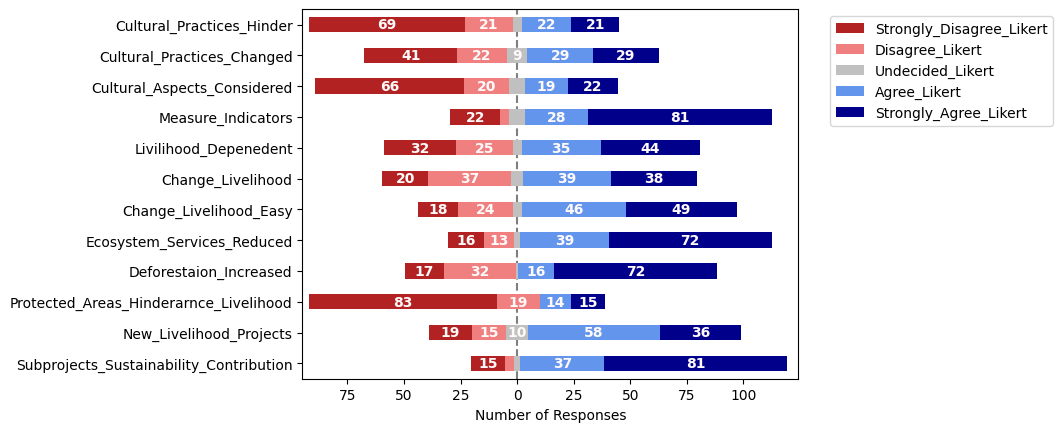

In [201]:
%matplotlib inline
plot_likert.plot_counts(all_counts2, plot_likert.scales.agree,  plot_percentage=False, bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)
plt.show()

7.3 Converting the Responses to Percentages
    The responses were converted to percentages

In [202]:
all_counts3 = df3.apply(lambda col: col.value_counts(normalize=True, dropna=False).round(2))

In [203]:
all_counts3 

,Cultural_Practices_Hinder,Cultural_Practices_Changed,Cultural_Aspects_Considered,Measure_Indicators,Livilihood_Depenedent,Change_Livelihood,Change_Livelihood_Easy,Ecosystem_Services_Reduced,Deforestaion_Increased,Protected_Areas_Hinderarnce_Livelihood,New_Livelihood_Projects,Subprojects_Sustainability_Contribution
Agree_Likert,0.15,0.19,0.13,0.19,0.23,0.26,0.31,0.26,0.11,0.09,0.39,0.25
Disagree_Likert,0.14,0.15,0.13,0.03,0.17,0.25,0.16,0.09,0.21,0.13,0.10,0.03
Strongly_Agree_Likert,0.14,0.19,0.15,0.54,0.29,0.25,0.33,0.48,0.48,0.10,0.24,0.54
Strongly_Disagree_Likert,0.46,0.27,0.44,0.15,0.21,0.13,0.12,0.11,0.11,0.55,0.13,0.10
Undecided_Likert,0.03,0.06,0.05,0.05,0.03,0.03,0.03,0.02,0.01,NaN,0.07,0.02
NaN,0.09,0.13,0.11,0.05,0.07,0.07,0.06,0.05,0.08,0.13,0.08,0.07


7.3.1 Transposing the Dataframe Table
      Interchanging the rows and columns

In [204]:
all_counts4 = all_counts3.head().T

In [205]:
all_counts4

,Agree_Likert,Disagree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Undecided_Likert
Cultural_Practices_Hinder,0.15,0.14,0.14,0.46,0.03
Cultural_Practices_Changed,0.19,0.15,0.19,0.27,0.06
Cultural_Aspects_Considered,0.13,0.13,0.15,0.44,0.05
Measure_Indicators,0.19,0.03,0.54,0.15,0.05
Livilihood_Depenedent,0.23,0.17,0.29,0.21,0.03
Change_Livelihood,0.26,0.25,0.25,0.13,0.03
Change_Livelihood_Easy,0.31,0.16,0.33,0.12,0.03
Ecosystem_Services_Reduced,0.26,0.09,0.48,0.11,0.02
Deforestaion_Increased,0.11,0.21,0.48,0.11,0.01
Protected_Areas_Hinderarnce_Livelihood,0.09,0.13,0.10,0.55,NaN


7.3.2 Changing the Order of Columns
      The order of columns was changed

In [206]:
all_counts5 = all_counts4.iloc[:, [3, 1, 4, 0, 2]]

In [207]:
all_counts5 

,Strongly_Disagree_Likert,Disagree_Likert,Undecided_Likert,Agree_Likert,Strongly_Agree_Likert
Cultural_Practices_Hinder,0.46,0.14,0.03,0.15,0.14
Cultural_Practices_Changed,0.27,0.15,0.06,0.19,0.19
Cultural_Aspects_Considered,0.44,0.13,0.05,0.13,0.15
Measure_Indicators,0.15,0.03,0.05,0.19,0.54
Livilihood_Depenedent,0.21,0.17,0.03,0.23,0.29
Change_Livelihood,0.13,0.25,0.03,0.26,0.25
Change_Livelihood_Easy,0.12,0.16,0.03,0.31,0.33
Ecosystem_Services_Reduced,0.11,0.09,0.02,0.26,0.48
Deforestaion_Increased,0.11,0.21,0.01,0.11,0.48
Protected_Areas_Hinderarnce_Livelihood,0.55,0.13,NaN,0.09,0.10


7.3.3 Visualising the Results
    The results are visualised as pecentages

C:\Users\nazin\AppData\Local\anaconda3\envs\NLTK_Py_3_12\Lib\site-packages\plot_likert\plot_likert.py:101: FutureWarning: parameter `plot_percentage` for `plot_likert.likert_counts` is deprecated, set it to None and use `compute_percentages` instead
  warn(


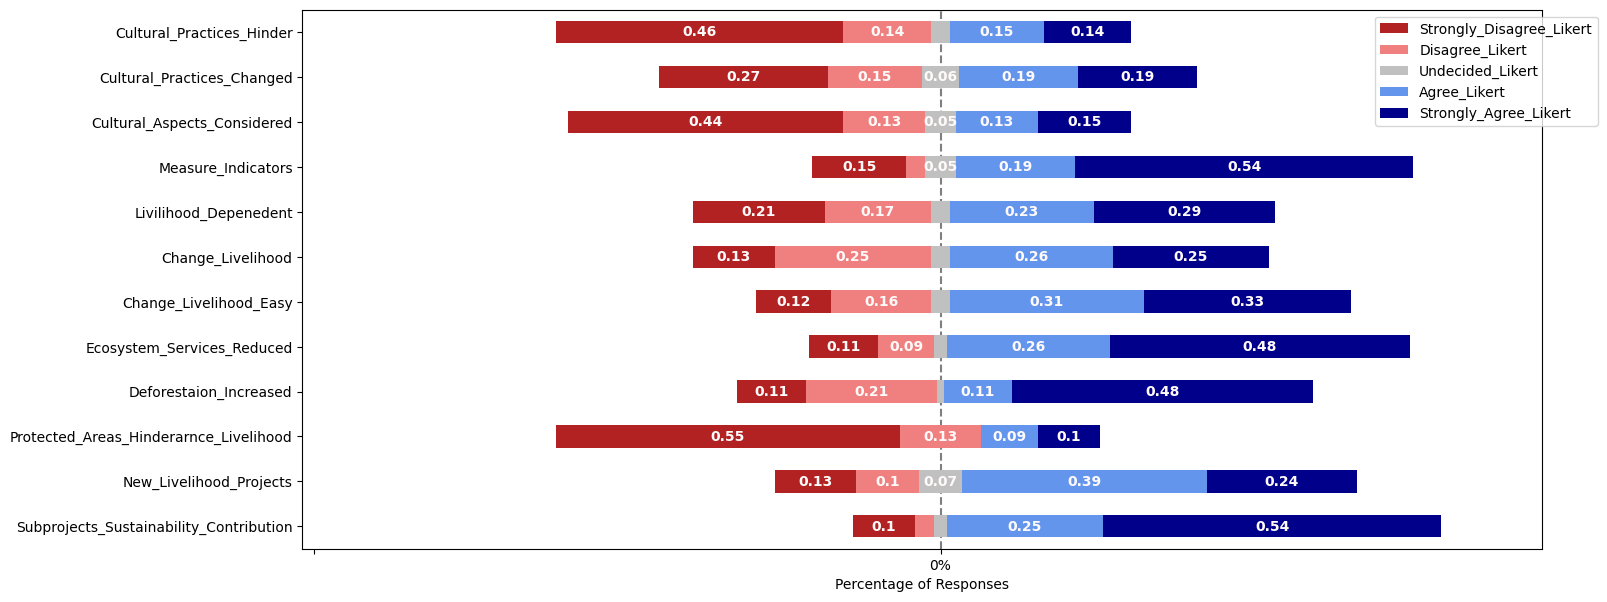

In [208]:
%matplotlib inline
plot_likert.plot_counts(all_counts5, plot_likert.scales.agree,  plot_percentage=True, figsize=(16, 7), bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)
plt.show()

8.0 Defined or Responses with Choices
    The responses that had choices other than those with a likert scale were grouped in a pandas dataframe looking the following question:
    
    '50. What is the main purpose of landscapes (Forests, Water Bodies, Wetlands… etc.) in your livelihood?': 'Purpose_Landscape', 
    '52. How is your connection to nature like?': 'Connection_Nature', 
    '54. How long have you worked on this livelihood project?': 'Livelihood_Project',
    '64. Which livelihood is a major contributor to landscape transformation?': 'Contributor_Landscape_Transformation',
    '66. Which type of landscape do you depend on much for a livelihood?': 'Landscape_Depended_Livelihood'
    

In [209]:
df4=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,14,16,18,19,20,21,22,23,24,25,26,28,30,31,32,33,34]], axis = 1)

In [210]:
df4

,Purpose_Landscape,Connection_Nature,Livelihood_Project,Contributor_Landscape_Transformation,Landscape_Depended_Livelihood
0,Nature_Protection_Purpose,"Psychological_Connection,Material_Connection",3to4Years_Long,Wood_Extraction,Agriculture_Areas_Dependent
1,Nature_Protection_Purpose,"Philosophical_Connection,Psychological_Connection",Greaterthan9Years_Long,Land_Agriculture,Wetlands_Dependent
2,"Nature_Protection_Purpose,Ancestral_Shrines_Purpose",Experiential_Connection,5to6Years_Long,Wood_Extraction,"Agriculture_Areas_Dependent,Wetlands_Dependent"
3,Source_Income_Purpose,Material_Connection,Greaterthan9Years_Long,Land_Agriculture,Agriculture_Areas_Dependent
4,Nature_Protection_Purpose,"Philosophical_Connection,Psychological_Connection",5to6Years_Long,Land_Agriculture,"Forest_Dependent,Wetlands_Dependent"
...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN
146,Nature_Protection_Purpose,Material_Connection,3to4Years_Long,Wood_Extraction,Agriculture_Areas_Dependent
147,NaN,Material_Connection,3to4Years_Long,Wood_Extraction,Agriculture_Areas_Dependent
148,Nature_Protection_Purpose,Material_Connection,3to4Years_Long,Uncontrolled_Fires,Agriculture_Areas_Dependent


8.1 The Purpose of Landscape to People

In [211]:
PL = df4['Purpose_Landscape'].value_counts(dropna=False)
PL_P = (df4['Purpose_Landscape'].value_counts(normalize=True, dropna=False).round(2))

In [212]:
PL_P

Purpose_Landscape
Nature_Protection_Purpose                              0.62
NaN                                                    0.22
Source_Income_Purpose                                  0.11
Nature_Protection_Purpose,Other_Purpose                0.01
Nature_Protection_Purpose,Ancestral_Shrines_Purpose    0.01
Source_Income_Purpose,Nature_Protection_Purpose        0.01
Nature_Protection_Purpose,Source_Income_Purpose        0.01
Source_Income_Purpose,Other_Purpose                    0.01
No_Idea_Purpose                                        0.01
Other_Purpose                                          0.01
Name: proportion, dtype: float64

In [213]:
df_PL = pd.DataFrame(PL)

In [214]:
df_PL

,count
Purpose_Landscape,
Nature_Protection_Purpose,93
NaN,33
Source_Income_Purpose,16
"Nature_Protection_Purpose,Other_Purpose",2
"Nature_Protection_Purpose,Ancestral_Shrines_Purpose",1
"Source_Income_Purpose,Nature_Protection_Purpose",1
"Nature_Protection_Purpose,Source_Income_Purpose",1
"Source_Income_Purpose,Other_Purpose",1
No_Idea_Purpose,1


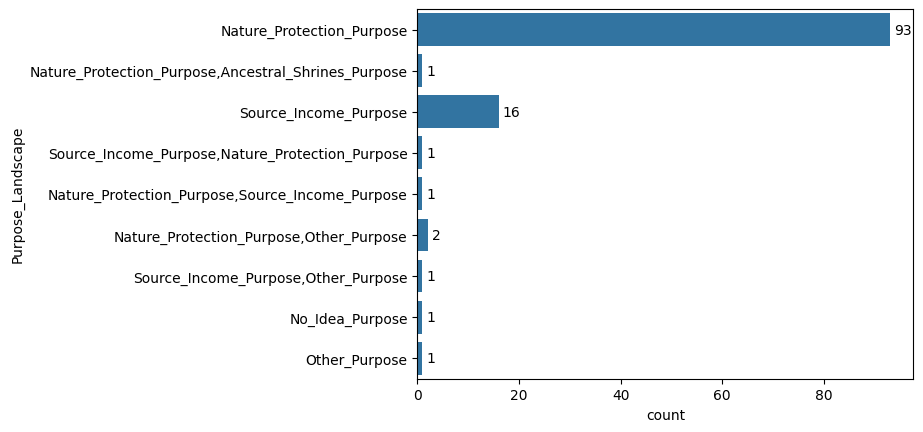

In [215]:
ax = sns.countplot(df4["Purpose_Landscape"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

8.2 The Connection of Nature to People

In [216]:
CN = df4['Connection_Nature'].value_counts(dropna=False)
CN_P = (df4['Connection_Nature'].value_counts(normalize=True, dropna=False).round(2))

In [217]:
CN_P

Connection_Nature
Material_Connection                                  0.82
NaN                                                  0.09
Other_Connection                                     0.04
Experiential_Connection                              0.01
Philosophical_Connection,Psychological_Connection    0.01
Psychological_Connection,Material_Connection         0.01
Psychological_Connection                             0.01
Philosophical_Connection                             0.01
Experiential_Connection,Material_Connection          0.01
Name: proportion, dtype: float64

In [218]:
df_CN = pd.DataFrame(CN)

In [219]:
df_CN

,count
Connection_Nature,
Material_Connection,123
NaN,13
Other_Connection,6
Experiential_Connection,2
"Philosophical_Connection,Psychological_Connection",2
"Psychological_Connection,Material_Connection",1
Psychological_Connection,1
Philosophical_Connection,1
"Experiential_Connection,Material_Connection",1


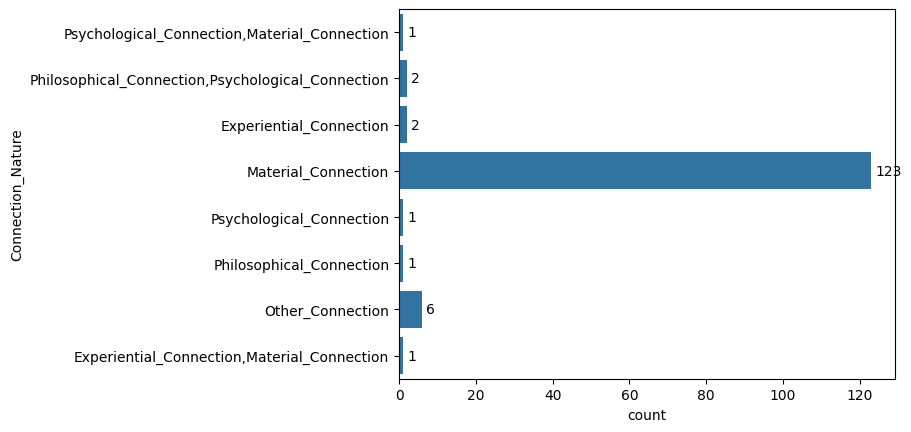

In [220]:
ax = sns.countplot(df4["Connection_Nature"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [311]:
agreement_levels = ["Material_Connection", "Other_Connection"]
CN_R = df2[df2["Connection_Nature"].isin(agreement_levels)]
CN_R1 = CN_R.drop(CPH_R.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CN_R1grouped = CN_R1.groupby('Name_Main_Project')['Connection_Nature']
CN_R1

,Name_Main_Project,Connection_Nature,Connection_Nature_Reasons
3,TRALARD_LNM,Material_Connection,To use some of them for income
6,TRALARD_LNM,Material_Connection,They are a source of income and for the future generation to see them
7,TRALARD_LNM,Material_Connection,Sourve of income
8,TRALARD_LNM,Material_Connection,It is a source of income
10,TRALARD_LNM,Material_Connection,Thats were we get income as welll as fro example cattle we use it for cultivating
...,...,...,...
144,PIN_WESTERN,Material_Connection,NaN
146,PIN_WESTERN,Material_Connection,NaN
147,PIN_WESTERN,Material_Connection,NaN
148,PIN_WESTERN,Material_Connection,NaN


8.3 The Length of Existence of the Livelihood Project

In [221]:
LP = df4['Livelihood_Project'].value_counts(dropna=False)
LP_P = (df4['Livelihood_Project'].value_counts(normalize=True, dropna=False).round(2))

In [222]:
LP_P

Livelihood_Project
3to4Years_Long            0.42
5to6Years_Long            0.33
NaN                       0.08
Lessthan2Years_Long       0.06
7to8Years_Long            0.06
Greaterthan9Years_Long    0.05
Name: proportion, dtype: float64

In [223]:
df_LP = pd.DataFrame(LP)

In [224]:
df_LP

,count
Livelihood_Project,
3to4Years_Long,63
5to6Years_Long,50
NaN,12
Lessthan2Years_Long,9
7to8Years_Long,9
Greaterthan9Years_Long,7


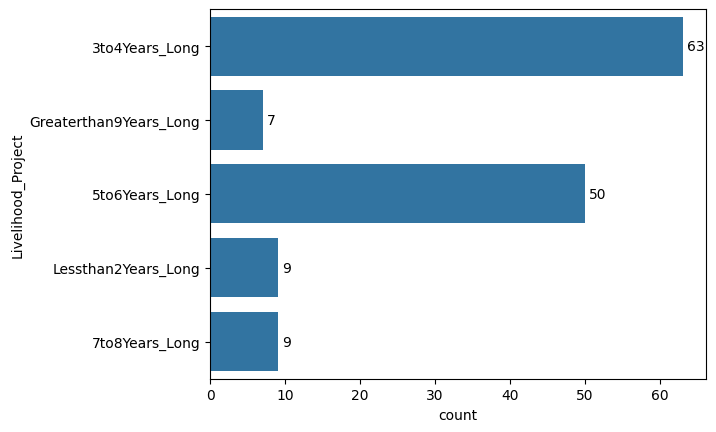

In [225]:
ax = sns.countplot(df4["Livelihood_Project"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

8.4 Major Contributor to Landscape Transformation

In [226]:
CLT = df4['Contributor_Landscape_Transformation'].value_counts(dropna=False)
CLT_P = (df4['Contributor_Landscape_Transformation'].value_counts(normalize=True, dropna=False).round(2))

In [227]:
CLT_P

Contributor_Landscape_Transformation
Uncontrolled_Fires                     0.33
Land_Agriculture                       0.29
Wood_Extraction                        0.26
NaN                                    0.09
Uncontrolled_Grazing                   0.01
Uncontrolled_Fires,Land_Agriculture    0.01
Other                                  0.01
Name: proportion, dtype: float64

In [228]:
df_CLT = pd.DataFrame(CLT)

In [229]:
df_CLT

,count
Contributor_Landscape_Transformation,
Uncontrolled_Fires,49
Land_Agriculture,44
Wood_Extraction,39
NaN,14
Uncontrolled_Grazing,2
"Uncontrolled_Fires,Land_Agriculture",1
Other,1


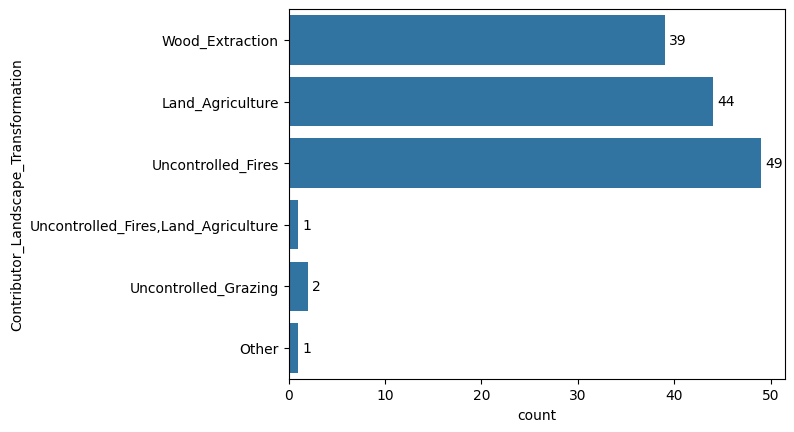

In [230]:
ax = sns.countplot(df4["Contributor_Landscape_Transformation"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [316]:
agreement_levels = ["Wood_Extration", "Land_Agriculture","Uncontrolled_Fires"]
CLT_R = df2[df2["Contributor_Landscape_Transformation"].isin(agreement_levels)]
CLT_R1 = CN_R.drop(CLT_R.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,29,30,31,32,33,34]], axis = 1)
CLT_R1grouped = CLT_R1.groupby('Name_Main_Project')['Contributor_Landscape_Transformation']
CLT_R1

,Name_Main_Project,Contributor_Landscape_Transformation,Contributor_Landscape_Transformation_Reasons
3,TRALARD_LNM,Land_Agriculture,Because it requires a huge land than the others the making chaocoal
6,TRALARD_LNM,Wood_Extraction,The burningbof chaorcaoal give smoke that destroys the ozone layer as well as it bring acidic rains
7,TRALARD_LNM,Land_Agriculture,There agricukture activitie for food
8,TRALARD_LNM,Wood_Extraction,There is no electrity huge demand for energy
10,TRALARD_LNM,Wood_Extraction,The charcaol purposes is bad because the land is left bare unlike for agriculture cutting which is rrplaced with othr plants
...,...,...,...
144,PIN_WESTERN,Uncontrolled_Fires,The trees when they get burnt they dry and thats the reason we have less rainfall
146,PIN_WESTERN,Wood_Extraction,They use chitemen system of just cuttingbtrees for choarcaol
147,PIN_WESTERN,Wood_Extraction,The trees and cut and make charcoal the do bnot grow
148,PIN_WESTERN,Uncontrolled_Fires,It distroys everythin on it ways


8.5 The Landscape depenede on for Livelihood

In [231]:
LDL = df4['Landscape_Depended_Livelihood'].value_counts(dropna=False)
LDL_P = (df4['Landscape_Depended_Livelihood'].value_counts(normalize=True, dropna=False).round(2))

In [232]:
LDL_P

Landscape_Depended_Livelihood
Agriculture_Areas_Dependent                       0.61
Wetlands_Dependent                                0.17
Forest_Dependent                                  0.09
NaN                                               0.09
Wetlands_Dependent,Forest_Dependent               0.03
Agriculture_Areas_Dependent,Wetlands_Dependent    0.01
Forest_Dependent,Wetlands_Dependent               0.01
Wetlands_Dependent,Agriculture_Areas_Dependent    0.01
Name: proportion, dtype: float64

In [233]:
df_LDL = pd.DataFrame(LDL)

In [234]:
df_LDL

,count
Landscape_Depended_Livelihood,
Agriculture_Areas_Dependent,92
Wetlands_Dependent,25
Forest_Dependent,13
NaN,13
"Wetlands_Dependent,Forest_Dependent",4
"Agriculture_Areas_Dependent,Wetlands_Dependent",1
"Forest_Dependent,Wetlands_Dependent",1
"Wetlands_Dependent,Agriculture_Areas_Dependent",1


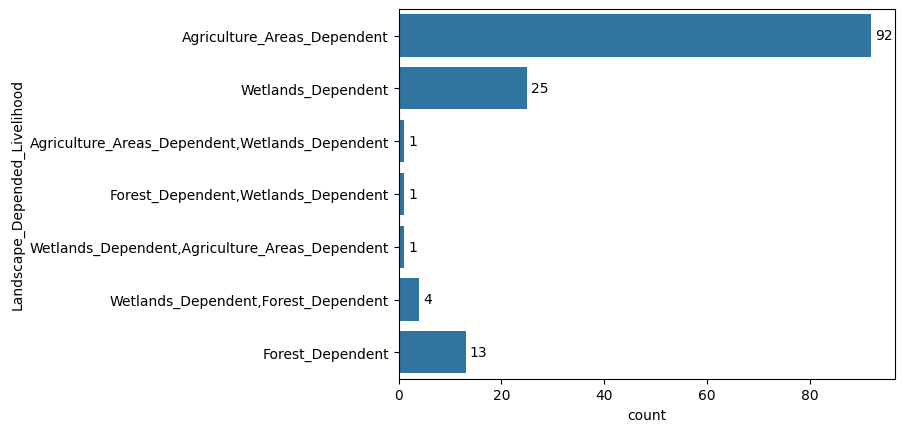

In [235]:
ax = sns.countplot(df4["Landscape_Depended_Livelihood"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [317]:
agreement_levels = ["Agriculture_Areas_Dependent", "Wetland_Depenedent","Forest_Dependent"]
LDL_R = df2[df2["Landscape_Depended_Livelihood"].isin(agreement_levels)]
LDL_R1 = LDL_R.drop(LDL_R.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,31,32,33,34]], axis = 1)
LDL_R1grouped = LDL_R1.groupby('Name_Main_Project')['Landscape_Depended_Livelihood']
LDL_R1

,Name_Main_Project,Landscape_Depended_Livelihood,Landscape_Depeneded_Livelihood_Reasons
0,TRALARD_LNM,Agriculture_Areas_Dependent,He caltivates a large area of land so that some crops can be sold for a livelihood
3,TRALARD_LNM,Agriculture_Areas_Dependent,Food is the main source of livelihood thus without it there is no way to earn a living
5,TRALARD_LNM,Agriculture_Areas_Dependent,There is a source of income as well as food for consuption
6,TRALARD_LNM,Agriculture_Areas_Dependent,There farming helps in sourcr of food
8,TRALARD_LNM,Agriculture_Areas_Dependent,Thats were a source of income
...,...,...,...
143,SCReBS_WESTERN,Agriculture_Areas_Dependent,We are farmers
144,PIN_WESTERN,Agriculture_Areas_Dependent,Thats is where we get our crops from
146,PIN_WESTERN,Agriculture_Areas_Dependent,We farmers
147,PIN_WESTERN,Agriculture_Areas_Dependent,Thats where we get food and money


8.6 Explanation to Choices
 It gives an explanation to the choice selected that is not among the choices that were provided in the list of the questionnaire

In [236]:
df5=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]], axis = 1)

In [237]:
df5

,Purpose_Landscape_Specific,Connection_Nature_Specific,Contributor_Landscape_Transformation_Specific,Landscape_Depended_Livelihood_Specific
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,Only the protection nature the others are not important,NaN,NaN,NaN
...,...,...,...,...
145,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN


In [238]:
df5["Purpose_Landscape_Specific"][0:150]
lemmatizer=WordNetLemmatizer()
for index, row in df5.iterrows():
    filter_sentence = []
    sentence = row["Purpose_Landscape_Specific"]
    sentence = re.sub(r'[^\w\s]','',sentence)
    words = nltk.word_tokenize(sentence)
    words = [w for w in words if not w in stop_words]
    for word in words:
        filter_sentence.append(lemmatizer.lemmatize(word))
    print(filter_sentence)

TypeError: expected string or bytes-like object, got 'float'

9.0 Description Statistics 
    It gives a beckground to the study sites

In [239]:
df6=df2.drop(df2.columns[[0,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)

In [240]:
df6

,Ward_Name,Sub_Project_name,Livelihood,Size,Name_Main_Project,Representing_Others,Number_Beneficiaries
0,Isamba ward,Isamba coperatives,Goat rearing,8to12Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many
1,Isamba ward,Misenga cooperative multipurpose society,"Goat rearing, Gardening, Fruit trees",Greaterthan16Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many
2,Isamba,Ninge Cooperative,"Goat Rearing, Agricuture-cassava",Greaterthan16Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many
3,Isamba ward,Twikatene copperatives,Goat rearing and Fish farming and garden of vegitable and onnoind,Greaterthan16Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many
4,Isamba ward,Changwena women club,Chicken rearing ablnd an orchard,Lessthan4Lima_Size,TRALARD_LNM,NaN,20to30People_Many
...,...,...,...,...,...,...,...
145,Yeta,NaN,Biochar,NaN,EbA_CENTRAL_MUCHINGA_LUAPULA,NaN,NaN
146,Yeta,Biochar,Gardening,Lessthan4Lima_Size,PIN_WESTERN,no,NaN
147,Yeta,Biochar,Gardening,Lessthan4Lima_Size,PIN_WESTERN,no,NaN
148,Yeta,B iochar,Gardenning,8to12Lima_Size,PIN_WESTERN,no,NaN


9.1 Main project Types
    This shows the number of questionaires that were administered to each project type

In [241]:
MP = df6['Name_Main_Project'].value_counts(dropna=False)

In [242]:
MP

Name_Main_Project
SCRiKA_LS                               41
TRALARD_LNM                             40
SCRALA_SOUTHERN_WESTERN_NORTHEN         29
SCReBS_WESTERN                          16
Ecosystem Conservation_NORTH_WESTERN     9
PIN_WESTERN                              5
EbA_CENTRAL_MUCHINGA_LUAPULA             4
NaN                                      3
Sustainable Luangwa_MAFINGA_DISTRICT     2
ZIFLP_EASTERN                            1
Name: count, dtype: int64

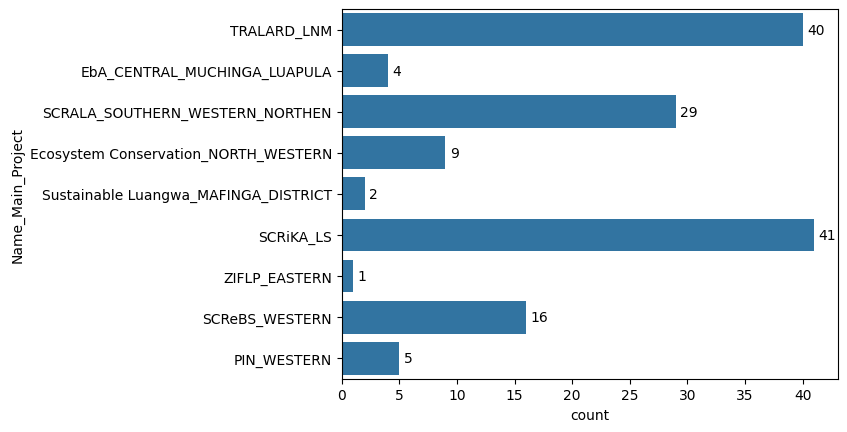

In [243]:
ax = sns.countplot(df6["Name_Main_Project"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

9.2 The Wards
    The wards that had respodents and their number

In [244]:
WN = df6['Ward_Name'].value_counts(dropna=False)

In [245]:
WN

Ward_Name
Mbila ward              14
Omba ward               13
NaN                      6
Makuya ward              6
Namwala central ward     6
                        ..
Kalobolewa ward          1
 mwanabuyu ward          1
Mwanbuyu warx            1
Yeta Ward                1
Yeta                     1
Name: count, Length: 63, dtype: int64

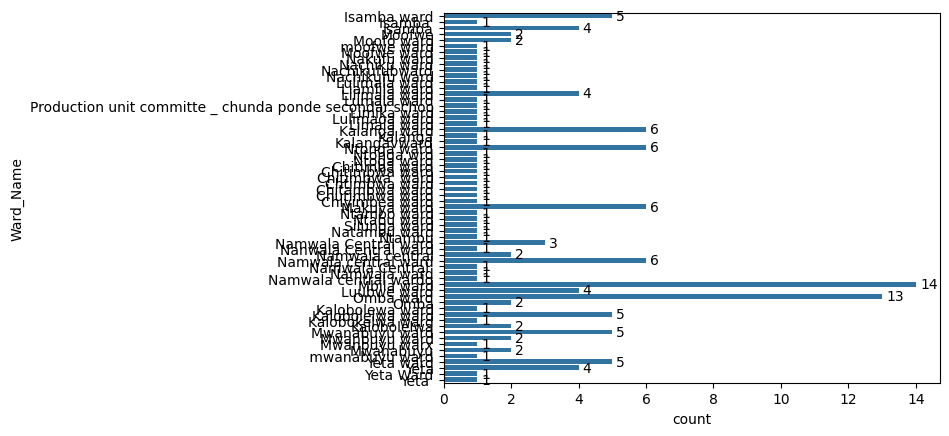

In [246]:
ax = sns.countplot(df6["Ward_Name"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

9.3 Number of beneficiaries
    It shows the number of households that benefited from the interviewees

In [247]:
NB = df6['Number_Beneficiaries'].value_counts(dropna=False)

In [248]:
NB

Number_Beneficiaries
Greaterthan40People_Many    40
NaN                         26
10to20People_Many           25
20to30People_Many           23
30to40People_Many           23
Lessthan10People_Many       13
Name: count, dtype: int64

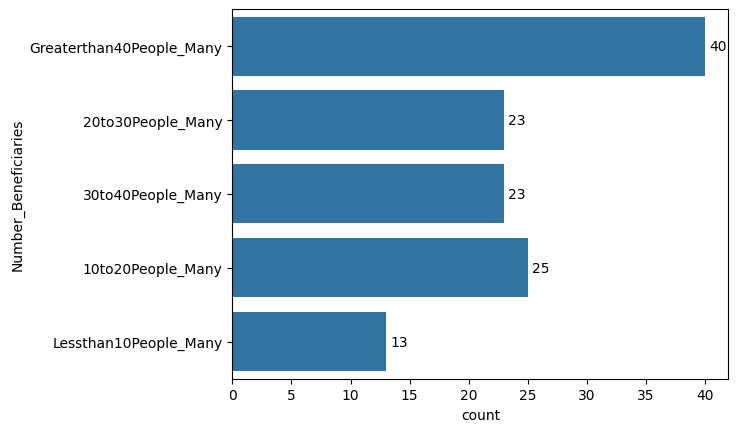

In [249]:
ax = sns.countplot(df6["Number_Beneficiaries"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

9.4 Size of Landscape

In [250]:
SIZE = df6['Size'].value_counts(dropna=False)

In [251]:
SIZE

Size
Lessthan4Lima_Size        48
Greaterthan16Lima_Size    40
NotApplicable_Size        30
4to8Lima_Size             13
NaN                       11
8to12Lima_Size             5
12to16Lima_Size            3
Name: count, dtype: int64

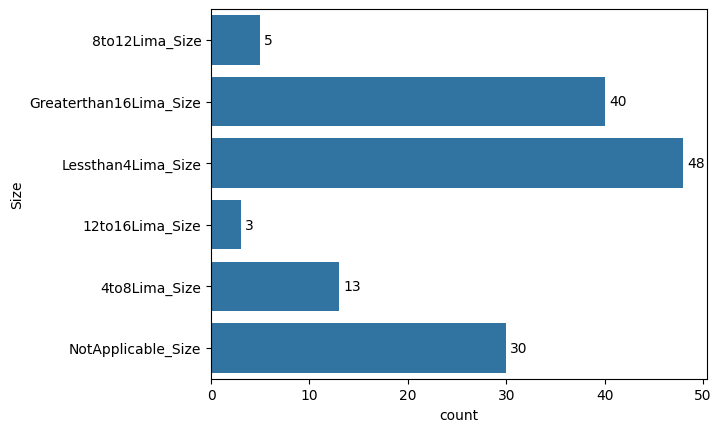

In [252]:
ax = sns.countplot(df6["Size"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

9.5 Represing Others
    It looks at those representing one house and more

In [253]:
RO = df6['Representing_Others'].value_counts(dropna=False)

In [254]:
RO

Representing_Others
yes    118
no      21
NaN     11
Name: count, dtype: int64

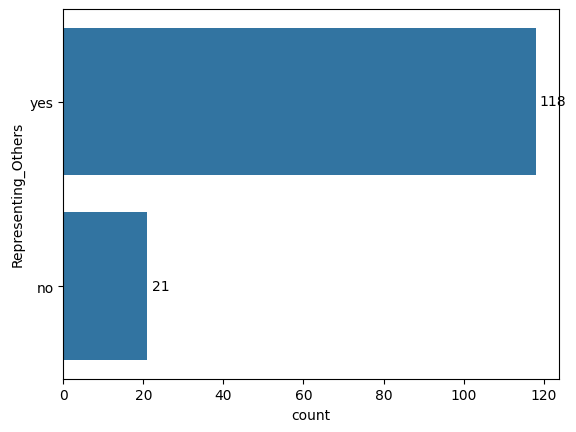

In [255]:
ax = sns.countplot(df6["Representing_Others"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

10.0 REASONS
The pandas dataframe depicts columns for the reasons to the responses to the likert scales

In [256]:
df7=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,8,10,11,13,14,15,17,18,19,20,22,23,24,25,26,27,29,31,32,33,34]], axis = 1)

In [257]:
df7

,Cultural_Practices_Hinder_Reason,Cultural_Aspects_Considered_Reasons,Connection_Nature_Reasons,Change_Livelihood_Easy_Reasons,Contributor_Landscape_Transformation_Reasons,Landscape_Depeneded_Livelihood_Reasons
0,It has never happed before in his life time,There are no cultural history in the area,The animals can be used by the future general as well,If the SES are taken care of they can increase in number and bring income to him,The trees have been depleted and it has caused reduced rainfall,He caltivates a large area of land so that some crops can be sold for a livelihood
1,There is need to harvest tree when they have fully grown the same applies to biodiversity,There is need to have power in what he formulating so that there is ownership,How the animals they lead thems we can get examples from them,The SeS can be depleted thus there need to chang to agrivulture like goat rearing,Because i have to clear the land gor agriculture for to plant crops hence the the lsndscsoe change,Tje killing of fish is the source of income in thix area
2,There are no customary practices that hinder sustainable management,There are nop cultural aspects,Through experiments he gains nkowledge on the management of forest,Change is easier because he is the one who has deciededs to change,There would a reduction in the number of trees hence contributing to clinate chsnge,He depends much on agriculture the most than fish because the fish can be depleted
3,There are rotations made on the land when cultivation to ensure fetility of soil,At the time of getting the land for the project it commes with regulations,To use some of them for income,Because my livelihood would improve,Because it requires a huge land than the others the making chaocoal,Food is the main source of livelihood thus without it there is no way to earn a living
4,There is nothing,We only follow what the chiefs and the governmnet say,They are important in our lifes like trees they provide home for animals as well as food. In addition improve the soil textureove,There has been thongs like climate change affecting us tjus the thought to chnage,Because people cut down tree for farmimg but they never use the land but he would prefer they use a small portion to leave trees as a home of willd animals,The water is used for gardening and other things
...,...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN,NaN
146,There is nothing,Only the indunas that send tye representative to learn and they accept the project in the community,NaN,The perwon can make a deciosn through lookig back what heor she done so as to make corrective measures,They use chitemen system of just cuttingbtrees for choarcaol,We farmers
147,There is nthing,There is nothing,NaN,As long as you aare commiteted,The trees and cut and make charcoal the do bnot grow,Thats where we get food and money
148,There is nothing,There is nothing,NaN,It is diffi jlt but as long as uou follow whag hou have been gaught uou can change,It distroys everythin on it ways,That were our food crops are found


10.1 Reasons for Cultural Practices Hidering
     The reasons for cultural practices that hinder transfromation

In [258]:
a = df7['Cultural_Practices_Hinder_Reason'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
filtered_tokens = [word for word in words if len(word) >= 4]
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_tokens]
token_counts = Counter(lemmatized_words)
rslt = pd.DataFrame(token_counts.most_common(20),
columns = ['Word', 'Frequency'])
print(rslt)

           Word  Frequency
0         there         88
1       nothing         67
2          that         19
3      practice         14
4          tree          9
5       protect          8
6          have          7
7          land          7
8        people          7
9          they          6
10     cultural          6
11    customary          5
12         from          5
13  environment          5
14         such          5
15         when          4
16   management          4
17         area          4
18    community          4
19         well          4


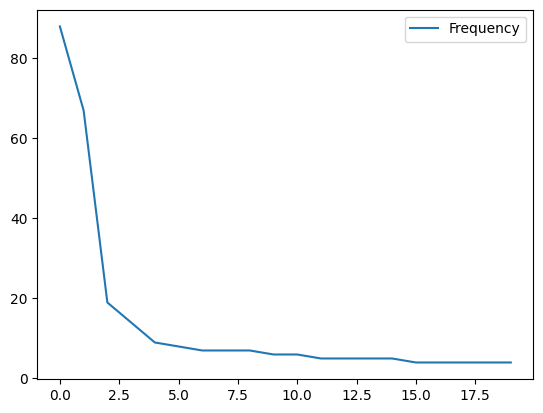

In [259]:
rslt = pd.DataFrame(rslt)
rslt.plot()
plt.show()

In [260]:
stop_words = stopwords.words ("English")

In [261]:
df7["Cultural_Practices_Hinder_Reason"][0:150]
lemmatizer=WordNetLemmatizer()
for index, row in df7.iterrows():
    filter_sentence = []
    sentence = row["Cultural_Practices_Hinder_Reason"]
    sentence = re.sub(r'[^\w\s]','',sentence)
    words = nltk.word_tokenize(sentence)
    words = [w for w in words if not w in stop_words]
    for word in words:
        filter_sentence.append(lemmatizer.lemmatize(word))
    print(filter_sentence)
    #df2.loc[index, "Cultural_Practices_Hinder_Reason"] = filter_sentence    

['It', 'never', 'happed', 'life', 'time']
['There', 'need', 'harvest', 'tree', 'fully', 'grown', 'applies', 'biodiversity']
['There', 'customary', 'practice', 'hinder', 'sustainable', 'management']
['There', 'rotation', 'made', 'land', 'cultivation', 'ensure', 'fetility', 'soil']
['There', 'nothing']
['There', 'nothing']
['Therevis', 'nothing']
['You', 'allowed', 'cultivate', 'area', '3', 'year', 'shifting', 'yo', 'another', 'area']
['There', 'nothing']
['There', 'nothing']
['There', 'cultural', 'history', 'within', 'community', 'e', 'cept', 'governmnet']
['There', 'rule', 'chief', 'ensurex', 'harvesting', 'period', 'followed', 'well', 'periond', 'vor', 'burining', 'bush']
['There', 'norm', 'period', 'bush', 'burt', 'sothe', 'bush', 'completely', 'burnt']
['There', 'cultural', 'norm']
['There', 'nothing']
['There', 'nothing']
['Threr', 'nothing']
['There', 'nothing']
['There', 'cusyomsry', 'practice', 'protect', 'thr', 'environment', 'like', 'Zawa', 'protect', 'thr', 'biofiversiyy']
['

TypeError: expected string or bytes-like object, got 'float'

In [262]:
word_count = len(words)

In [263]:
counts = Counter(words)

In [264]:
counts

Counter({'If': 1,
         'tyere': 1,
         'ciktural': 1,
         'practices': 1,
         'firturr': 1,
         'genrationbwill': 1,
         'inow': 1,
         'anything': 1})

In [265]:
word_count

8

In [266]:
print(f"Number of words: {word_count}")

Number of words: 8


In [267]:
list(filter_sentence)

[]

In [268]:
count, word = word

ValueError: too many values to unpack (expected 2)

11.0 SPECIFIC VARIABLES

11.1 Main project and Cultural Practices
The responses are grouped in line with the main projects

In [269]:
CPH_grouped = df2.groupby('Name_Main_Project')['Cultural_Practices_Hinder'].value_counts(dropna=False)

In [270]:
CPH_grouped

Name_Main_Project                     Cultural_Practices_Hinder
EbA_CENTRAL_MUCHINGA_LUAPULA          Strongly_Agree_Likert         2
                                      Strongly_Disagree_Likert      1
                                      NaN                           1
Ecosystem Conservation_NORTH_WESTERN  Strongly_Disagree_Likert      4
                                      NaN                           2
                                      Agree_Likert                  1
                                      Disagree_Likert               1
                                      Strongly_Agree_Likert         1
PIN_WESTERN                           Strongly_Disagree_Likert      5
SCRALA_SOUTHERN_WESTERN_NORTHEN       Disagree_Likert              11
                                      Strongly_Disagree_Likert      8
                                      Agree_Likert                  5
                                      Strongly_Agree_Likert         2
                          

In [271]:
CPH_grouped1 = pd.DataFrame(CPH_grouped)

In [272]:
CPH_grouped1

count
Name_Main_Project                    Cultural_Practices_Hinder       
EbA_CENTRAL_MUCHINGA_LUAPULA         Strongly_Agree_Likert          2
                                     Strongly_Disagree_Likert       1
                                     NaN                            1
Ecosystem Conservation_NORTH_WESTERN Strongly_Disagree_Likert       4
                                     NaN                            2
                                     Agree_Likert                   1
                                     Disagree_Likert                1
                                     Strongly_Agree_Likert          1
PIN_WESTERN                          Strongly_Disagree_Likert       5
SCRALA_SOUTHERN_WESTERN_NORTHEN      Disagree_Likert               11
                                     Strongly_Disagree_Likert       8
                                     Agree_Likert                   5
                                     Strongly_Agree_Likert          2
                                     Undecided_Likert               2
                                     NaN                            1
SCReBS_WESTERN                       Strongly_Disagree_Likert      15
                                     Agree_Likert                   1
SCRiKA_LS                            Strongly_Disagree_Likert      18
                                     Disagree_Likert                6
                                     Agree_Likert                   5
                                     Strongly_Agree_Likert          5
                                     NaN                            5
                                     Undecided_Likert               2
Sustainable Luangwa_MAFINGA_DISTRICT Strongly_Agree_Likert          1
                                     Strongly_Disagree_Likert       1
TRALARD_LNM                          Strongly_Disagree_Likert      15
                                     Agree_Likert                  10
                                     Strongly_Agree_Likert         10
                                     Disagree_Likert                3
                                     NaN                            2
ZIFLP_EASTERN                        Strongly_Disagree_Likert       1

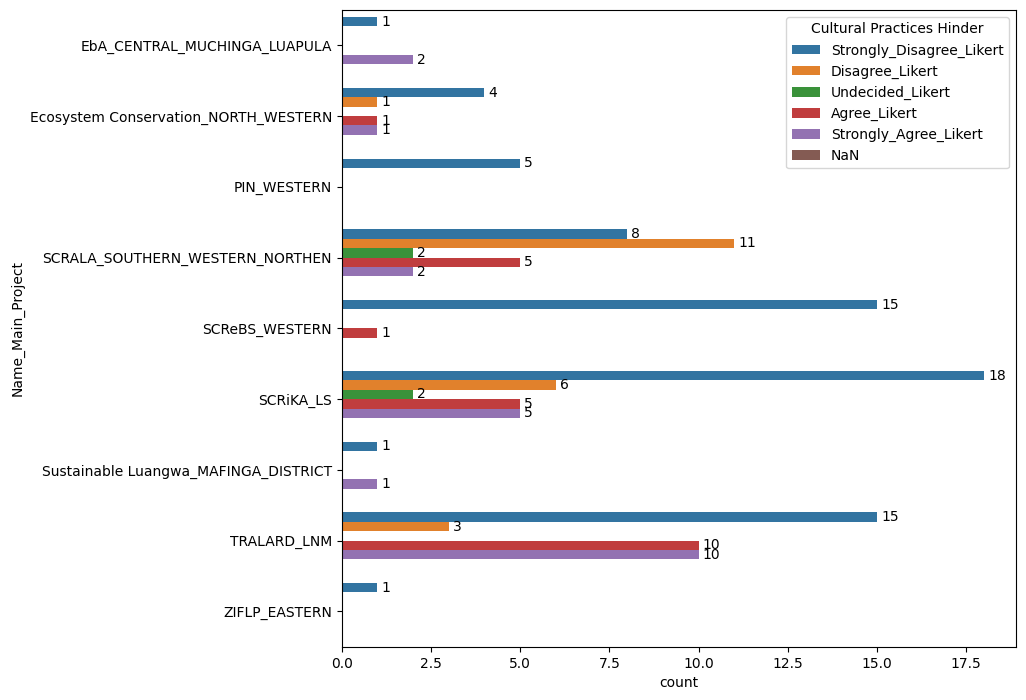

In [273]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert", "NaN"]
ax = sns.barplot(data = CPH_grouped1, x="count", y="Name_Main_Project", hue="Cultural_Practices_Hinder", hue_order=hue_order, legend=True)
plt.legend(title="Cultural Practices Hinder")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [287]:
agreement_levels = ["Agree_Likert", "Strongly_Agree_Likert"]
#filtered_df = df2[df[Cultural_Practices_Hinder].isin(agreement_levels).any(axis=1)]
CPH_R = df2[df2["Cultural_Practices_Hinder"].isin(agreement_levels)]

In [295]:
CPH_R1 = CPH_R.drop(CPH_R.columns[[0,1,2,3,4,6,7,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CPH_R1grouped = CPH_R1.groupby('Name_Main_Project')['Cultural_Practices_Hinder']
CPH_R1

,Name_Main_Project,Cultural_Practices_Hinder,Cultural_Practices_Hinder_Reason
0,TRALARD_LNM,Agree_Likert,It has never happed before in his life time
1,TRALARD_LNM,Strongly_Agree_Likert,There is need to harvest tree when they have fully grown the same applies to biodiversity
3,TRALARD_LNM,Strongly_Agree_Likert,There are rotations made on the land when cultivation to ensure fetility of soil
6,TRALARD_LNM,Agree_Likert,Therevis nothing
7,TRALARD_LNM,Strongly_Agree_Likert,You are allowed to cultivate an area for 3 years before shifting yo another area
11,TRALARD_LNM,Strongly_Agree_Likert,There rules from the chiefs who ensurex the harvesting period are followed as well as the periond vor burining the bush
12,TRALARD_LNM,Strongly_Agree_Likert,There is a norms of the period when the bush has to be be burt sothe the bush is not completely burnt
17,TRALARD_LNM,Strongly_Agree_Likert,There is nothing
19,TRALARD_LNM,Strongly_Agree_Likert,He has nevervhearfvof the or leqrntbabout it
22,TRALARD_LNM,Strongly_Agree_Likert,The cutting down of tree along the river is not allowed


In [296]:
agreement_levels = ["Disagree_Likert", "Strongly_Disagree_Likert"]
#filtered_df = df2[df[Cultural_Practices_Hinder].isin(agreement_levels).any(axis=1)]
CPH_R2 = df2[df2["Cultural_Practices_Hinder"].isin(agreement_levels)]

In [297]:
CPH_R3 = CPH_R2.drop(CPH_R2.columns[[0,1,2,3,4,6,7,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CPH_R3grouped = CPH_R3.groupby('Name_Main_Project')['Cultural_Practices_Hinder']
CPH_R3

,Name_Main_Project,Cultural_Practices_Hinder,Cultural_Practices_Hinder_Reason
2,TRALARD_LNM,Strongly_Disagree_Likert,There are no customary practices that hinder sustainable management
4,TRALARD_LNM,Strongly_Disagree_Likert,There is nothing
5,TRALARD_LNM,Strongly_Disagree_Likert,There is nothing
8,TRALARD_LNM,Strongly_Disagree_Likert,There is nothing
9,TRALARD_LNM,Strongly_Disagree_Likert,There is nothing
...,...,...,...
144,PIN_WESTERN,Strongly_Disagree_Likert,There is nothjng
146,PIN_WESTERN,Strongly_Disagree_Likert,There is nothing
147,PIN_WESTERN,Strongly_Disagree_Likert,There is nthing
148,PIN_WESTERN,Strongly_Disagree_Likert,There is nothing


11.2 Main project and Cultural Practices Changed

In [105]:
CPC_grouped = df2.groupby('Name_Main_Project')['Cultural_Practices_Changed'].value_counts(dropna=False)

In [106]:
CPC_grouped

Name_Main_Project                     Cultural_Practices_Changed
EbA_CENTRAL_MUCHINGA_LUAPULA          Strongly_Agree_Likert          1
                                      Strongly_Disagree_Likert       1
                                      Undecided_Likert               1
                                      NaN                            1
Ecosystem Conservation_NORTH_WESTERN  NaN                            4
                                      Strongly_Agree_Likert          3
                                      Strongly_Disagree_Likert       2
PIN_WESTERN                           Strongly_Disagree_Likert       4
                                      Strongly_Agree_Likert          1
SCRALA_SOUTHERN_WESTERN_NORTHEN       Agree_Likert                  10
                                      Disagree_Likert                7
                                      Strongly_Disagree_Likert       4
                                      Undecided_Likert               4
            

In [107]:
CPC_grouped1 = pd.DataFrame(CPC_grouped)

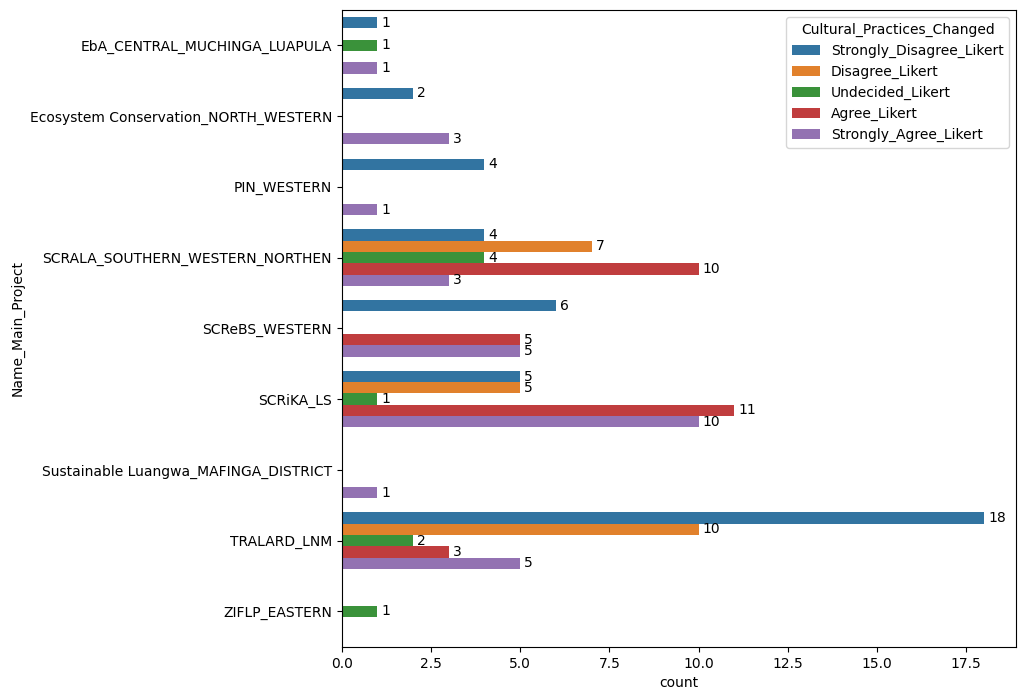

In [108]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = CPC_grouped1, x="count", y="Name_Main_Project", hue="Cultural_Practices_Changed", hue_order=hue_order, legend=True)
plt.legend(title="Cultural_Practices_Changed")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

11.3 Main project and Cultural Aspects Considered

In [109]:
CAC_grouped = df2.groupby('Name_Main_Project')['Cultural_Aspects_Considered'].value_counts(dropna=False)

In [110]:
CAC_grouped1 = pd.DataFrame(CAC_grouped)

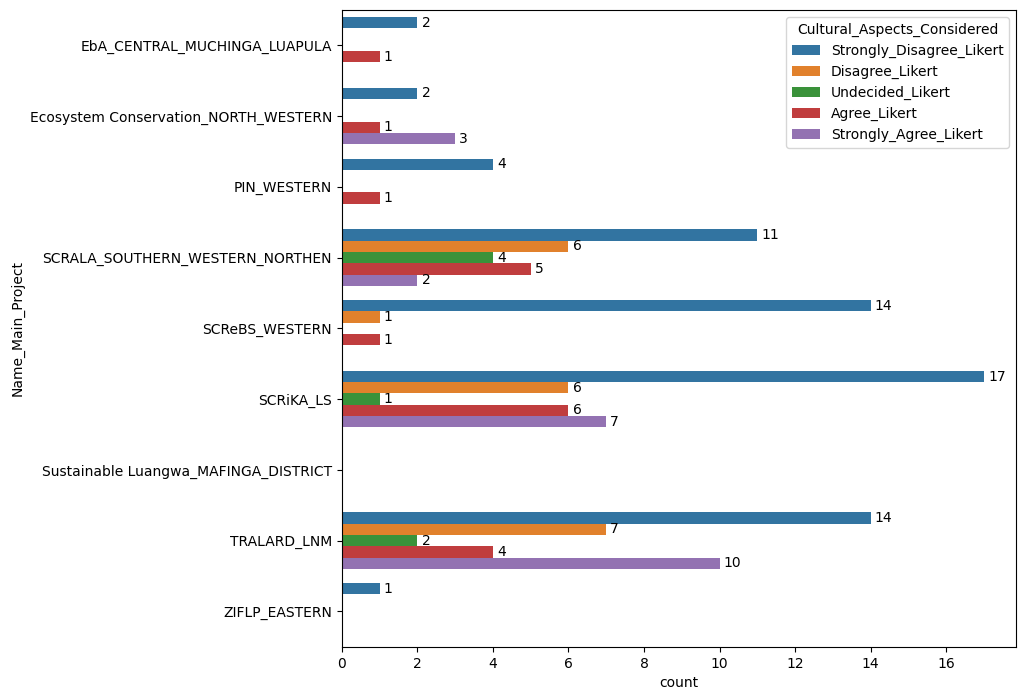

In [111]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = CAC_grouped1, x="count", y="Name_Main_Project", hue="Cultural_Aspects_Considered", hue_order=hue_order, legend=True)
plt.legend(title="Cultural_Aspects_Considered")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [300]:
agreement_levels = ["Agree_Likert", "Strongly_Agree_Likert"]
CAC_R = df2[df2["Cultural_Aspects_Considered"].isin(agreement_levels)]
CAC_R1 = CAC_R.drop(CPH_R.columns[[0,1,2,3,4,6,7,8,9,10,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CAC_R1grouped = CAC_R1.groupby('Name_Main_Project')['Cultural_Aspects_Considered']
CAC_R1

,Name_Main_Project,Cultural_Aspects_Considered,Cultural_Aspects_Considered_Reasons
1,TRALARD_LNM,Strongly_Agree_Likert,There is need to have power in what he formulating so that there is ownership
3,TRALARD_LNM,Strongly_Agree_Likert,At the time of getting the land for the project it commes with regulations
7,TRALARD_LNM,Strongly_Agree_Likert,There rules thatvatvthe river banks they do not need to cut downntrees
11,TRALARD_LNM,Strongly_Agree_Likert,There are sometimes we have to givd the chiefs frpm the the havest that the collect or produce that has to be accounted for
17,TRALARD_LNM,Strongly_Agree_Likert,There is nothing because that thongs ended a long time ago the chiefs would talk to thr spirits to prptect yhe land
21,TRALARD_LNM,Strongly_Agree_Likert,Thsy arebnot included
22,TRALARD_LNM,Strongly_Agree_Likert,If there arevno customarybpractices thr natutal resourcrs can getv distroyed
23,EbA_CENTRAL_MUCHINGA_LUAPULA,Agree_Likert,No answer
24,TRALARD_LNM,Agree_Likert,No answer
25,TRALARD_LNM,Agree_Likert,If if is not done the product or project will not work well


In [301]:
agreement_levels = ["Disagree_Likert", "Strongly_Disagree_Likert"]
CAC_R2 = df2[df2["Cultural_Aspects_Considered"].isin(agreement_levels)]
CAC_R3 = CAC_R2.drop(CPH_R2.columns[[0,1,2,3,4,6,7,8,9,10,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CAC_R3grouped = CAC_R3.groupby('Name_Main_Project')['Cultural_Aspects_Considered']
CAC_R3

,Name_Main_Project,Cultural_Aspects_Considered,Cultural_Aspects_Considered_Reasons
0,TRALARD_LNM,Strongly_Disagree_Likert,There are no cultural history in the area
2,TRALARD_LNM,Strongly_Disagree_Likert,There are nop cultural aspects
4,TRALARD_LNM,Strongly_Disagree_Likert,We only follow what the chiefs and the governmnet say
5,TRALARD_LNM,Strongly_Disagree_Likert,There is nothing
6,TRALARD_LNM,Strongly_Disagree_Likert,There is nothing
...,...,...,...
143,SCReBS_WESTERN,Strongly_Disagree_Likert,They are not included
144,PIN_WESTERN,Strongly_Disagree_Likert,We do not include
147,PIN_WESTERN,Strongly_Disagree_Likert,There is nothing
148,PIN_WESTERN,Strongly_Disagree_Likert,There is nothing


11.4 Main project and Measure of Indicators

In [112]:
MI_grouped = df2.groupby('Name_Main_Project')['Measure_Indicators'].value_counts(dropna=False)

In [113]:
MI_grouped1 = pd.DataFrame(MI_grouped)

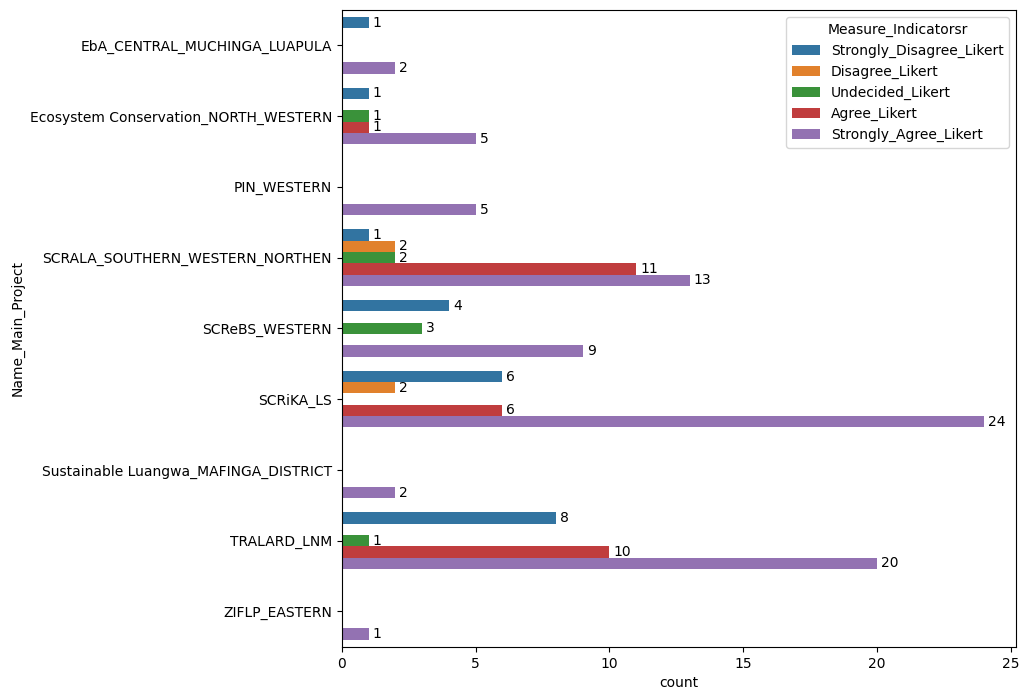

In [114]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = MI_grouped1, x="count", y="Name_Main_Project", hue="Measure_Indicators", hue_order=hue_order, legend=True)
plt.legend(title="Measure_Indicatorsr")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

11.5 Main project and Livelihood Dependent

In [115]:
LD_grouped = df2.groupby('Name_Main_Project')['Livilihood_Depenedent'].value_counts(dropna=False)

In [116]:
LD_grouped1 = pd.DataFrame(LD_grouped)

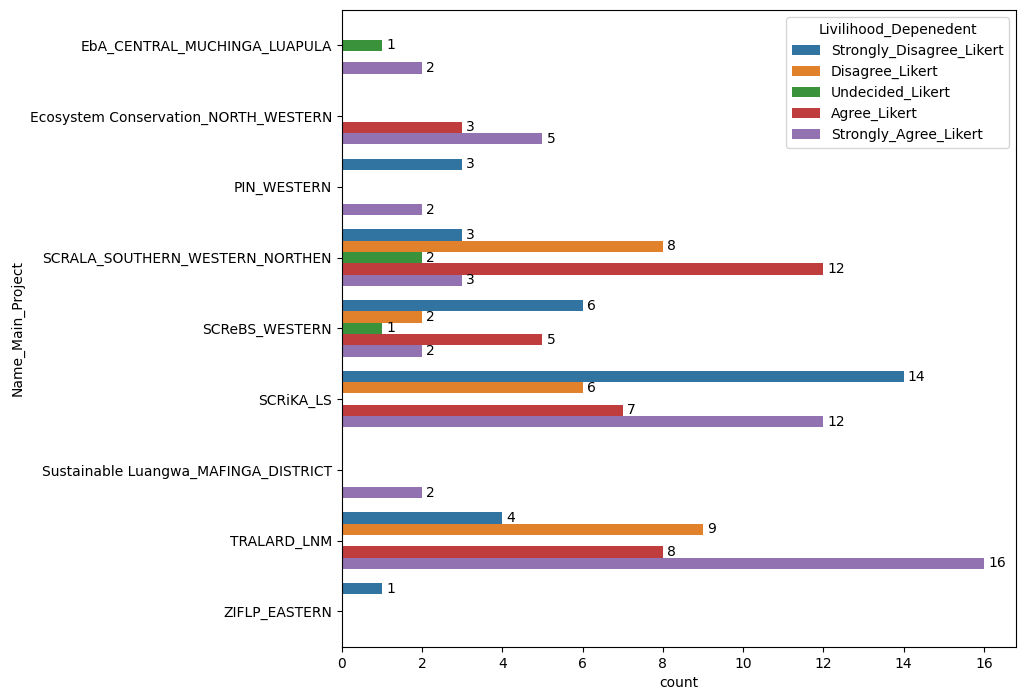

In [117]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = LD_grouped1, x="count", y="Name_Main_Project", hue="Livilihood_Depenedent", hue_order=hue_order, legend=True)
plt.legend(title="Livilihood_Depenedent")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

11.6 Main project and Livelihood Changed

In [118]:
CL_grouped = df2.groupby('Name_Main_Project')['Change_Livelihood'].value_counts(dropna=False)

In [119]:
CL_grouped1 = pd.DataFrame(CL_grouped)

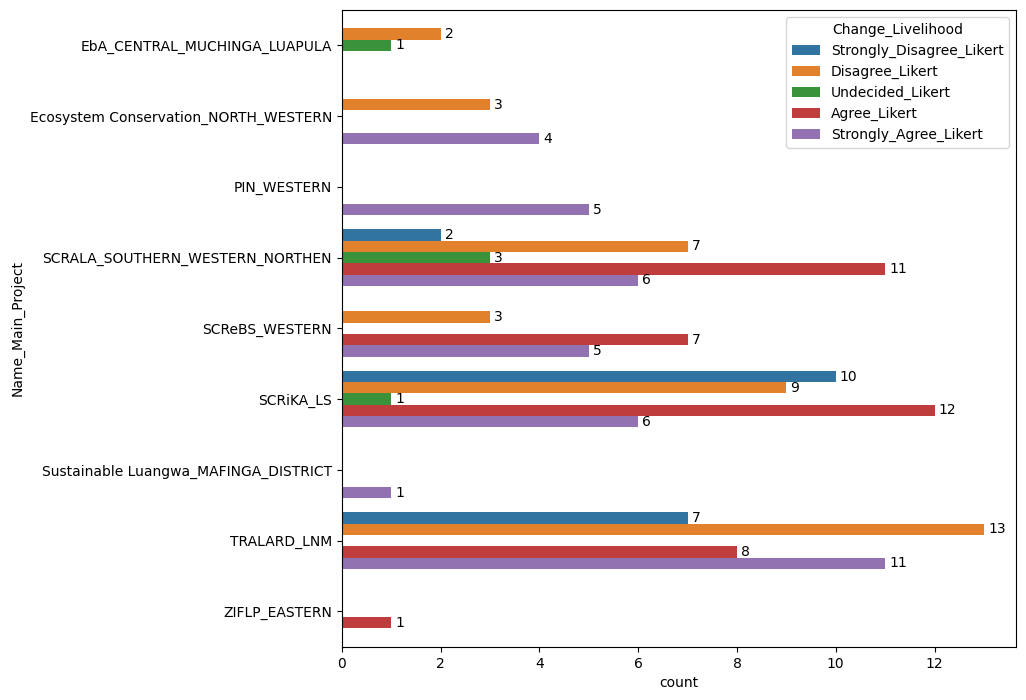

In [120]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = CL_grouped1, x="count", y="Name_Main_Project", hue="Change_Livelihood", hue_order=hue_order, legend=True)
plt.legend(title="Change_Livelihood")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

11.7 Main project and Livelihood Changing Easy

In [121]:
CLE_grouped = df2.groupby('Name_Main_Project')['Change_Livelihood_Easy'].value_counts(dropna=False)

In [122]:
CLE_grouped1 = pd.DataFrame(CLE_grouped)

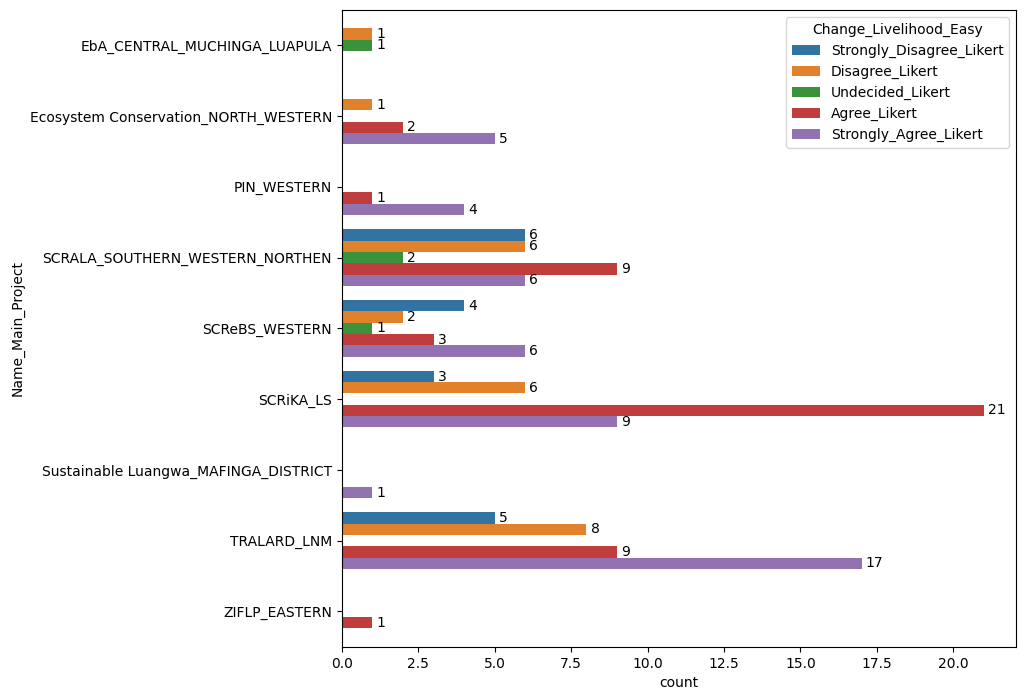

In [123]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = CLE_grouped1, x="count", y="Name_Main_Project", hue="Change_Livelihood_Easy", hue_order=hue_order, legend=True)
plt.legend(title="Change_Livelihood_Easy")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [307]:
agreement_levels = ["Agree_Likert", "Strongly_Agree_Likert"]
CLE_R = df2[df2["Change_Livelihood_Easy"].isin(agreement_levels)]
CLE_R1 = CPH_R.drop(CPH_R.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CLE_R1grouped = CLE_R1.groupby('Name_Main_Project')['Change_Livelihood_Easy']
CLE_R1

,Name_Main_Project,Change_Livelihood_Easy,Change_Livelihood_Easy_Reasons
0,TRALARD_LNM,Strongly_Agree_Likert,If the SES are taken care of they can increase in number and bring income to him
1,TRALARD_LNM,Strongly_Agree_Likert,The SeS can be depleted thus there need to chang to agrivulture like goat rearing
3,TRALARD_LNM,Strongly_Disagree_Likert,Because my livelihood would improve
6,TRALARD_LNM,Strongly_Agree_Likert,There can be destruction of SES
7,TRALARD_LNM,Strongly_Agree_Likert,There need tonchange from cuuting downnto other activities
11,TRALARD_LNM,Strongly_Agree_Likert,If if we had keept welll the projects like chicken and goats that would help to depend on the natural resources
12,TRALARD_LNM,Strongly_Agree_Likert,Thriught the fish ponds of our project
17,TRALARD_LNM,Strongly_Agree_Likert,NaN
19,TRALARD_LNM,Disagree_Likert,The world is becoming mordenised thusb we nedd to adqpt tobthe current status
22,TRALARD_LNM,Strongly_Agree_Likert,We need to changev for instance we depend on watre from lilimala river and ifbit dries we will no tobgetvwater


In [308]:
agreement_levels = ["Disagree_Likert", "Strongly_Disagree_Likert"]
CLE_R2 = df2[df2["Change_Livelihood_Easy"].isin(agreement_levels)]
CLE_R3 = CLE_R2.drop(CLE_R2.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CLE_R3grouped = CLE_R3.groupby('Name_Main_Project')['Change_Livelihood_Easy']
CLE_R3

,Name_Main_Project,Change_Livelihood_Easy,Change_Livelihood_Easy_Reasons
3,TRALARD_LNM,Strongly_Disagree_Likert,Because my livelihood would improve
10,TRALARD_LNM,Strongly_Disagree_Likert,"Beacause everything we use comes from natural resources like tree for bulding, animals for protains"
16,TRALARD_LNM,Strongly_Disagree_Likert,It is a source of income
18,TRALARD_LNM,Strongly_Disagree_Likert,They can assit in having adwuate watervif trees are not cut as well as furture genersl to see thrvnstural redourced
19,TRALARD_LNM,Disagree_Likert,The world is becoming mordenised thusb we nedd to adqpt tobthe current status
20,TRALARD_LNM,Disagree_Likert,Thats where some of our income cones from
23,EbA_CENTRAL_MUCHINGA_LUAPULA,Disagree_Likert,Iy is becausr we depend on naturwl resources thus cahanging is noy easy
24,TRALARD_LNM,Disagree_Likert,I do mot use natural resources
28,TRALARD_LNM,Strongly_Disagree_Likert,We deoend on agruculture and not the naturalnresource like forest
31,TRALARD_LNM,Disagree_Likert,We mostly use goats pigs innour livelihoods


11.8 Main project and Ecosystem Service Reduction

In [124]:
ESR_grouped = df2.groupby('Name_Main_Project')['Ecosystem_Services_Reduced'].value_counts(dropna=False)

In [125]:
ESR_grouped1 = pd.DataFrame(ESR_grouped)

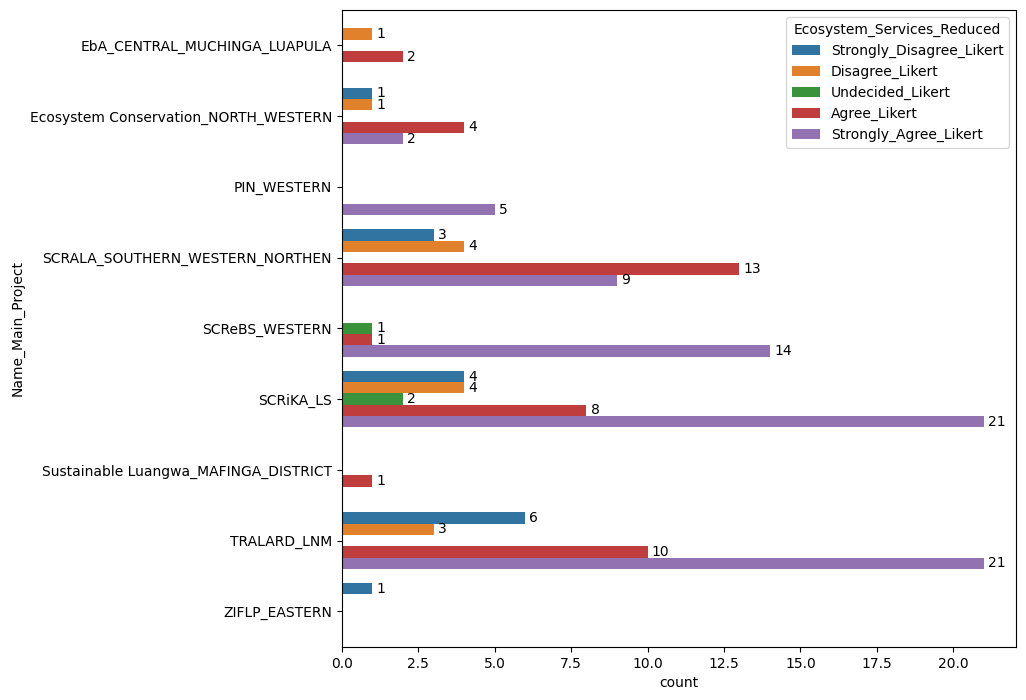

In [126]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = ESR_grouped1, x="count", y="Name_Main_Project", hue="Ecosystem_Services_Reduced", hue_order=hue_order, legend=True)
plt.legend(title="Ecosystem_Services_Reduced")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

11.9 Main project and Deforestation Increase

In [127]:
DI_grouped = df2.groupby('Name_Main_Project')['Deforestaion_Increased'].value_counts(dropna=False)

In [128]:
DI_grouped1 = pd.DataFrame(DI_grouped)

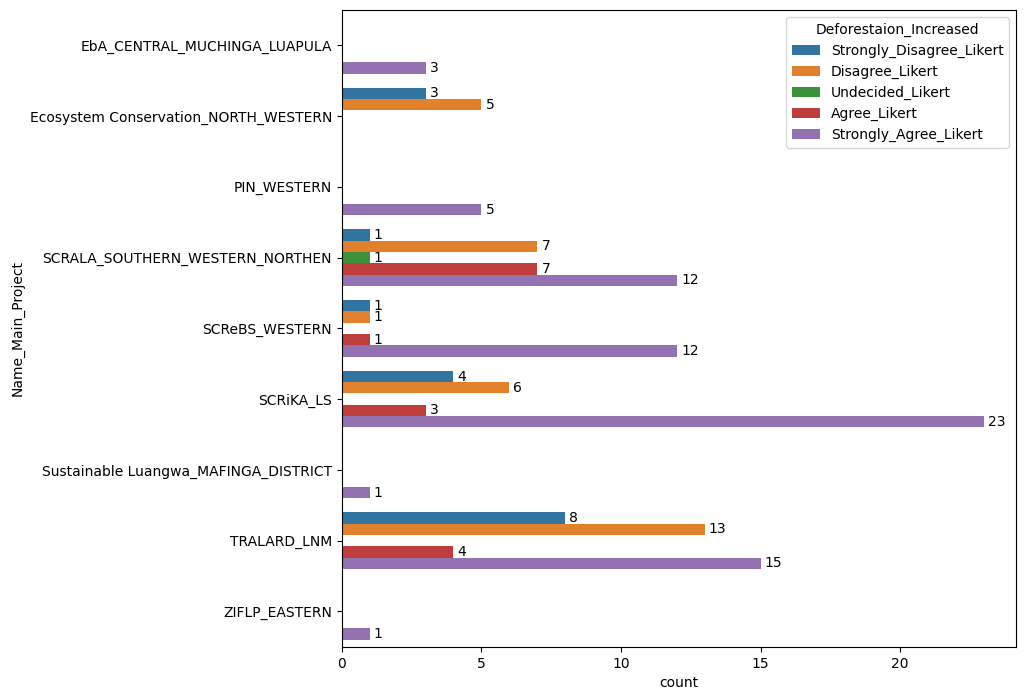

In [129]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = DI_grouped1, x="count", y="Name_Main_Project", hue="Deforestaion_Increased", hue_order=hue_order, legend=True)
plt.legend(title="Deforestaion_Increased")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

11.10 Main project and Protected Areas as a Hinderance

In [130]:
PAHL_grouped = df2.groupby('Name_Main_Project')['Protected_Areas_Hinderarnce_Livelihood'].value_counts(dropna=False)

In [131]:
PAHL_grouped1 = pd.DataFrame(PAHL_grouped)

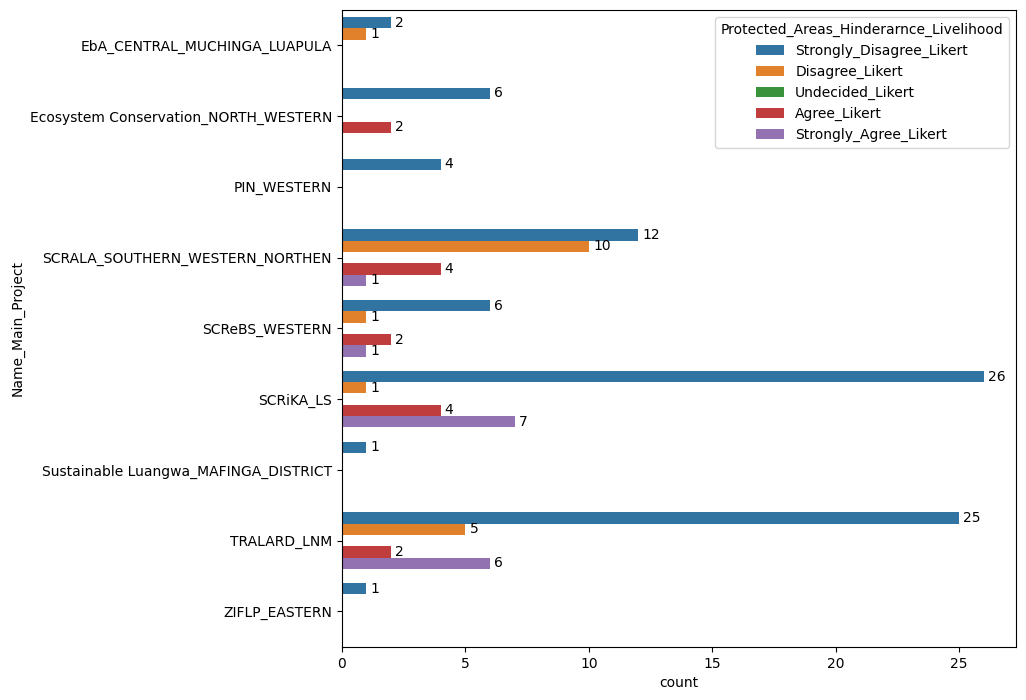

In [132]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = PAHL_grouped1, x="count", y="Name_Main_Project", hue="Protected_Areas_Hinderarnce_Livelihood", hue_order=hue_order, legend=True)
plt.legend(title="Protected_Areas_Hinderarnce_Livelihood")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

11.11 Main project and New Livelihood Projects

In [133]:
NLP_grouped = df2.groupby('Name_Main_Project')['New_Livelihood_Projects'].value_counts(dropna=False)

In [134]:
NLP_grouped1 = pd.DataFrame(NLP_grouped)

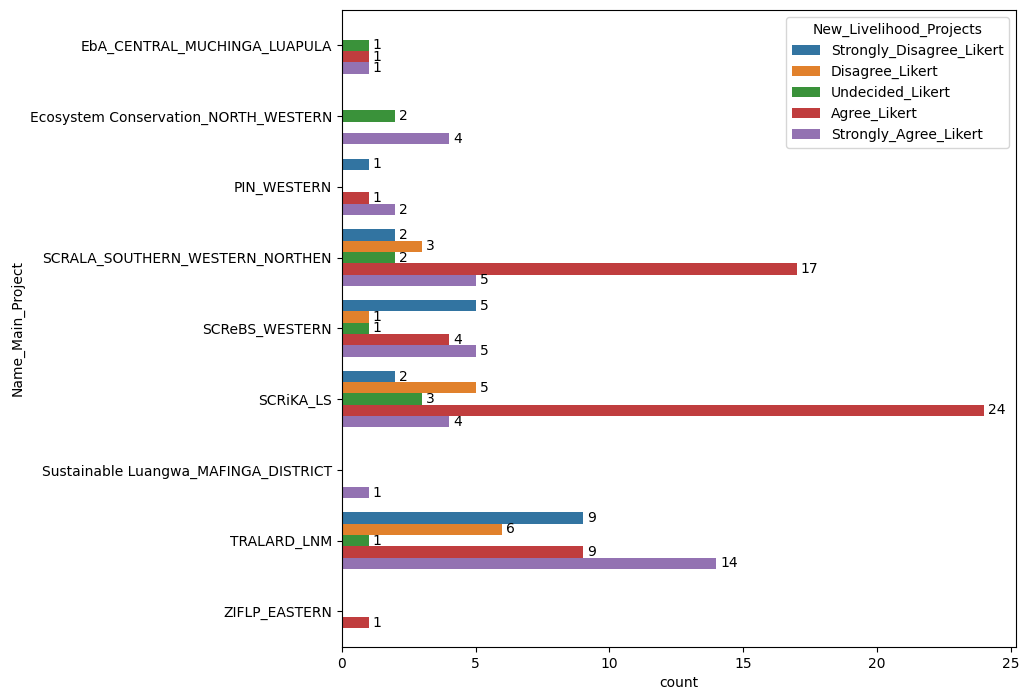

In [135]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = NLP_grouped1, x="count", y="Name_Main_Project", hue="New_Livelihood_Projects", hue_order=hue_order, legend=True)
plt.legend(title="New_Livelihood_Projects")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

11.12 Main project and Sustainability of Subprojects

In [136]:
SSC_grouped = df2.groupby('Name_Main_Project')['Subprojects_Sustainability_Contribution'].value_counts(dropna=False)

In [137]:
SSC_grouped1 = pd.DataFrame(SSC_grouped)

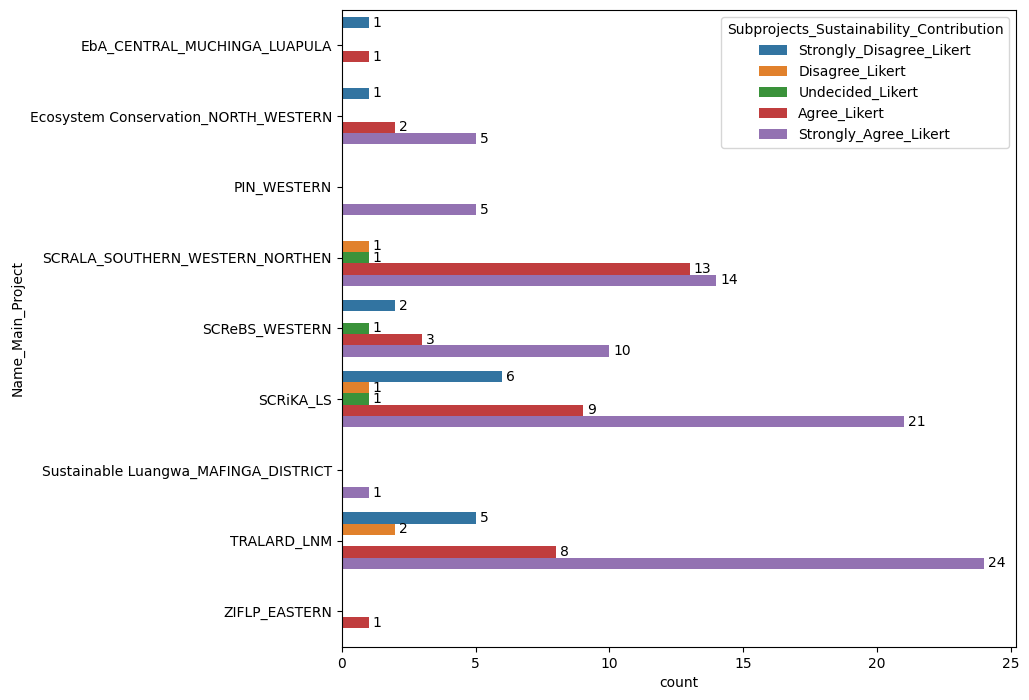

In [138]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = SSC_grouped1, x="count", y="Name_Main_Project", hue="Subprojects_Sustainability_Contribution", hue_order=hue_order, legend=True)
plt.legend(title="Subprojects_Sustainability_Contribution")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [139]:
 df20 = df2[['Name_Main_Project','Cultural_Practices_Hinder','Subprojects_Sustainability_Contribution']]

In [140]:
all_count = df20.apply(pd.Series.value_counts)

In [141]:
all_count

,Name_Main_Project,Cultural_Practices_Hinder,Subprojects_Sustainability_Contribution
Agree_Likert,NaN,22.0,37.0
Disagree_Likert,NaN,21.0,4.0
EbA_CENTRAL_MUCHINGA_LUAPULA,4.0,NaN,NaN
Ecosystem Conservation_NORTH_WESTERN,9.0,NaN,NaN
PIN_WESTERN,5.0,NaN,NaN
SCRALA_SOUTHERN_WESTERN_NORTHEN,29.0,NaN,NaN
SCReBS_WESTERN,16.0,NaN,NaN
SCRiKA_LS,41.0,NaN,NaN
Strongly_Agree_Likert,NaN,21.0,81.0
Strongly_Disagree_Likert,NaN,69.0,15.0
